In [ ]:
dataset_path = "/content/drive/MyDrive/dataset_2306146/heart_disease_uci.csv"

In [ ]:
# EXPLORATORY DATA ANALYSIS (EDA) - DATASET PENYAKIT JANTUNG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Konfigurasi tampilan
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [ ]:
# Muat dataset
dataset_path = "/content/drive/MyDrive/dataset_2306146/heart_disease_uci.csv"
try:
    df = pd.read_csv(dataset_path)
    print(f"Dataset berhasil dimuat dari: {dataset_path}")
except FileNotFoundError:
    print(f"Error: File dataset tidak ditemukan di {dataset_path}. Mohon pastikan file sudah diunggah.")
    exit() # Stop execution if file not found

print("=== INFORMASI DATASET ===")
print(f"Ukuran dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nNama kolom:")
print(df.columns.tolist())

print("\n=== INFORMASI TIPE DATA ===")
print(df.dtypes)

print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe())

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

Dataset berhasil dimuat dari: /content/drive/MyDrive/dataset_2306146/heart_disease_uci.csv
=== INFORMASI DATASET ===
Ukuran dataset: (920, 16)
Jumlah baris: 920
Jumlah kolom: 16

Nama kolom:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

=== INFORMASI TIPE DATA ===
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

=== STATISTIK DESKRIPTIF ===
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.06

In [ ]:
# Deteksi nama kolom yang sebenarnya
print("\n=== DETEKSI KOLOM ===")
columns_mapping = {}

# Deteksi kolom target
target_candidates = ['num', 'target', 'heart_disease', 'hd']
target_col = None
for col in target_candidates:
    if col in df.columns:
        target_col = col
        break

if target_col:
    print(f"Kolom target ditemukan: {target_col}")
    # Remap target jika perlu
    if target_col == 'num':
        df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
        print(f"Kolom 'target' dibuat dari kolom '{target_col}'")
    else:
        df['target'] = df[target_col]

    print(f"\n=== DISTRIBUSI KOLOM TARGET ===")
    print(df['target'].value_counts())
else:
    print("PERINGATAN: Kolom target tidak ditemukan!")
    print("Kolom yang tersedia:", df.columns.tolist())


=== DETEKSI KOLOM ===
Kolom target ditemukan: num
Kolom 'target' dibuat dari kolom 'num'

=== DISTRIBUSI KOLOM TARGET ===
target
1    509
0    411
Name: count, dtype: int64


In [ ]:
# Mapping kolom berdasarkan kemungkinan nama yang berbeda
possible_mappings = {
    'age': ['age', 'Age'],
    'sex': ['sex', 'Sex', 'gender'],
    'cp': ['cp', 'chest_pain', 'chest_pain_type'],
    'trestbps': ['trestbps', 'resting_bp', 'rest_bp', 'bp'],
    'chol': ['chol', 'cholesterol', 'serum_chol'],
    'fbs': ['fbs', 'fasting_bs', 'fasting_blood_sugar'],
    'restecg': ['restecg', 'rest_ecg', 'resting_ecg'],
    'thalach': ['thalach', 'max_hr', 'max_heart_rate', 'maximum_heart_rate'],
    'exang': ['exang', 'exercise_angina', 'ex_angina'],
    'oldpeak': ['oldpeak', 'st_depression', 'depression'],
    'slope': ['slope', 'st_slope'],
    'ca': ['ca', 'vessels', 'num_vessels'],
    'thal': ['thal', 'thalassemia']
}

# Deteksi kolom yang tersedia
available_columns = {}
for standard_name, possible_names in possible_mappings.items():
    for possible_name in possible_names:
        if possible_name in df.columns:
            available_columns[standard_name] = possible_name
            break

print("\nKolom yang berhasil dideteksi:")
for standard, actual in available_columns.items():
    print(f"  {standard} -> {actual}")


Kolom yang berhasil dideteksi:
  age -> age
  sex -> sex
  cp -> cp
  trestbps -> trestbps
  chol -> chol
  fbs -> fbs
  restecg -> restecg
  exang -> exang
  oldpeak -> oldpeak
  slope -> slope
  ca -> ca
  thal -> thal


In [ ]:
# Identifikasi kolom numerik dan kategorikal
numeric_cols = []
categorical_cols = []

for standard_name, actual_name in available_columns.items():
    if df[actual_name].dtype in ['int64', 'float64']:
        if standard_name in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
            numeric_cols.append(actual_name)
        else:
            categorical_cols.append(actual_name)
    else:
        categorical_cols.append(actual_name)

print(f"\nKolom numerik: {numeric_cols}")
print(f"Kolom kategorikal: {categorical_cols}")


Kolom numerik: ['age', 'trestbps', 'chol', 'oldpeak']
Kolom kategorikal: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']



4.1 VISUALISASI DISTRIBUSI DATA


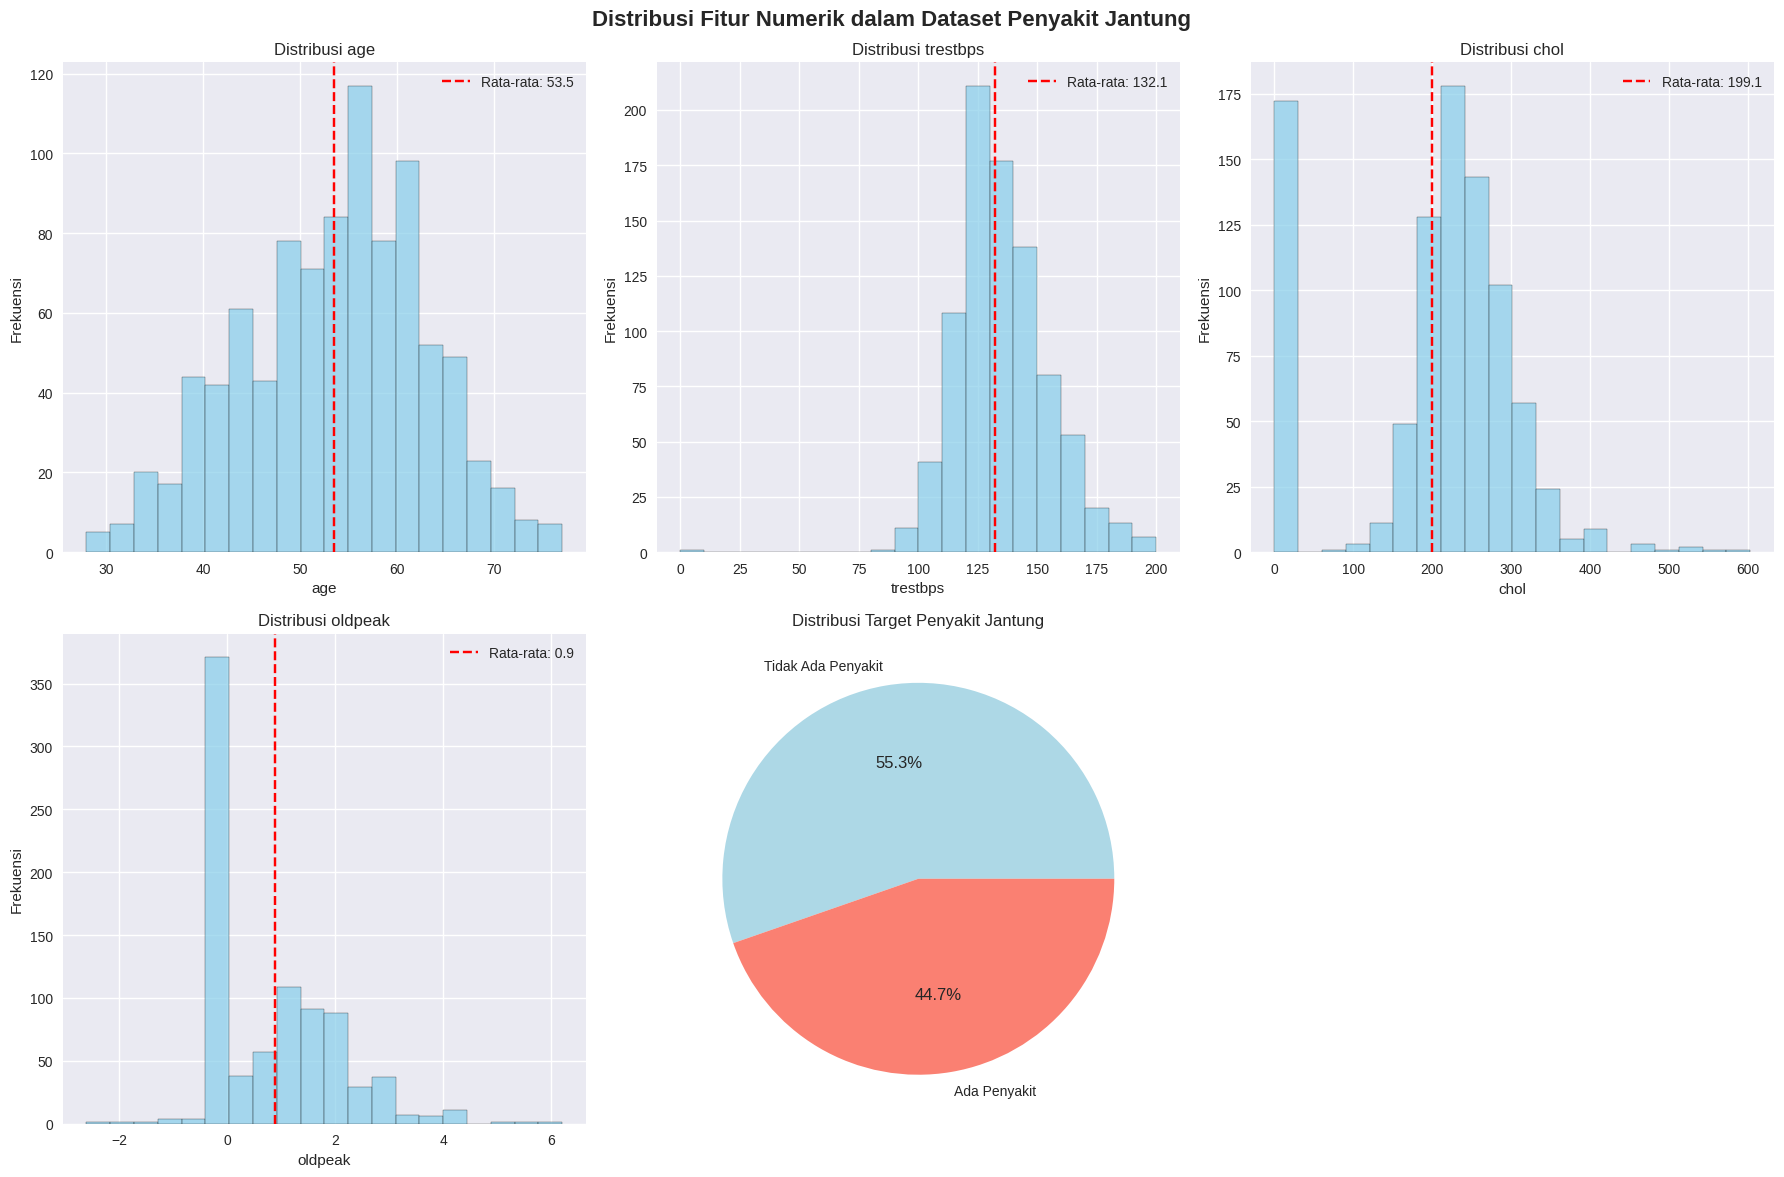

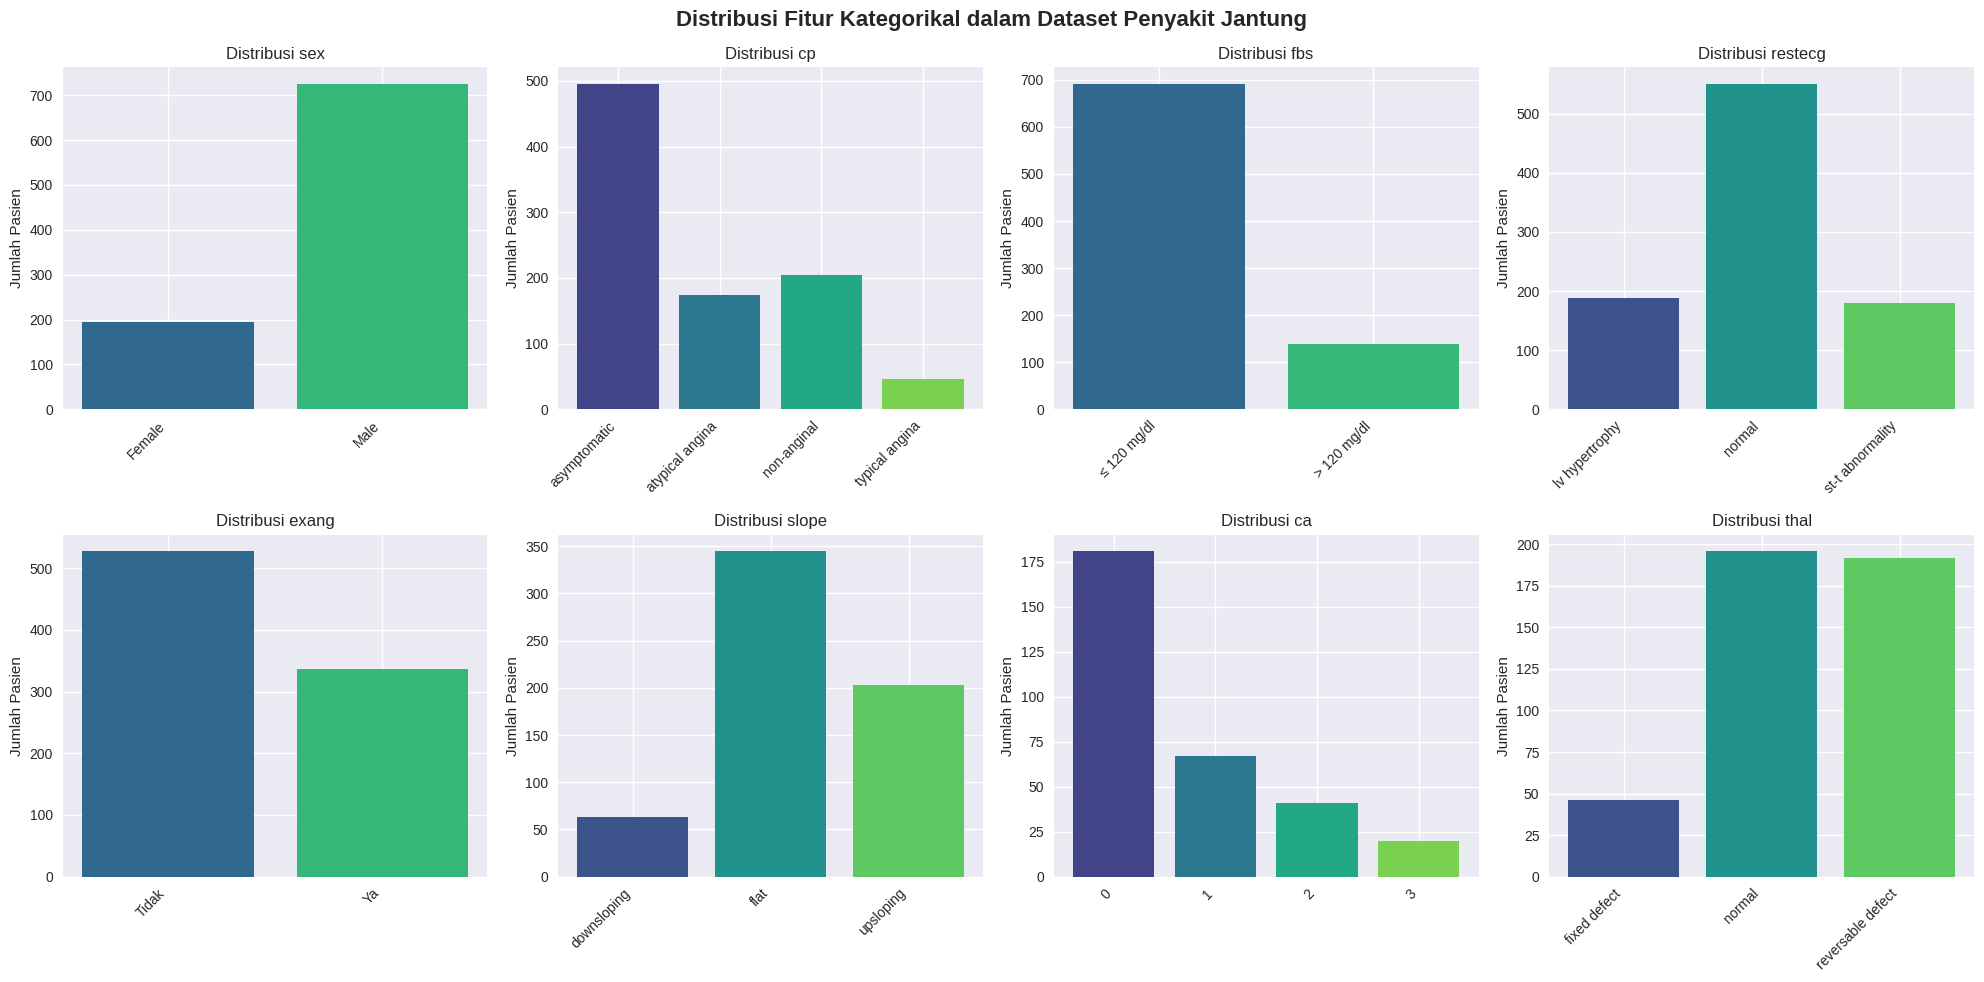

In [ ]:
# ===============================
# 4.1 VISUALISASI DISTRIBUSI DATA
# ===============================

print("\n" + "="*50)
print("4.1 VISUALISASI DISTRIBUSI DATA")
print("="*50)

if numeric_cols:
    # Visualisasi distribusi fitur numerik
    n_cols = len(numeric_cols)
    if n_cols > 0:
        # Hitung ukuran subplot
        n_rows = (n_cols + 2) // 3  # +2 untuk target dan satu kosong
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
        fig.suptitle('Distribusi Fitur Numerik dalam Dataset Penyakit Jantung', fontsize=16, fontweight='bold')

        # Flatten axes jika lebih dari satu baris
        if n_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes] if n_cols == 1 else axes

        # Plot histogram untuk setiap fitur numerik
        for i, col in enumerate(numeric_cols):
            if i < len(axes):
                axes[i].hist(df[col], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
                axes[i].set_title(f'Distribusi {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frekuensi')
                axes[i].axvline(df[col].mean(), color='red', linestyle='--',
                               label=f'Rata-rata: {df[col].mean():.1f}')
                axes[i].legend()

        # Target distribution pie chart jika ada
        if 'target' in df.columns and len(axes) > len(numeric_cols):
            target_counts = df['target'].value_counts()
            axes[len(numeric_cols)].pie(target_counts.values,
                                       labels=['Tidak Ada Penyakit', 'Ada Penyakit'],
                                       autopct='%1.1f%%', colors=['lightblue', 'salmon'])
            axes[len(numeric_cols)].set_title('Distribusi Target Penyakit Jantung')

        # Sembunyikan subplot kosong
        for i in range(len(numeric_cols) + (1 if 'target' in df.columns else 0), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()
# Visualisasi fitur kategorikal
if categorical_cols:
    # Definisi label yang fleksibel
    feature_labels = {
        'sex': {0: 'Perempuan', 1: 'Laki-laki'},
        'cp': {0: 'Asimptomatik', 1: 'Angina Tipikal', 2: 'Angina Atipikal', 3: 'Nyeri Non-Anginal'},
        'fbs': {0: '≤ 120 mg/dl', 1: '> 120 mg/dl'},
        'restecg': {0: 'Normal', 1: 'Abnormalitas ST-T', 2: 'Hipertrofi Ventrikel Kiri'},
        'exang': {0: 'Tidak', 1: 'Ya'},
        'slope': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
        'ca': {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'},
        'thal': {1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'}
    }

    n_cat_cols = len(categorical_cols)
    if n_cat_cols > 0:
        n_rows = (n_cat_cols + 3) // 4
        fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
        fig.suptitle('Distribusi Fitur Kategorikal dalam Dataset Penyakit Jantung',
                     fontsize=16, fontweight='bold')

        if n_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes] if n_cat_cols == 1 else axes

        for i, col in enumerate(categorical_cols):
            if i < len(axes):
                counts = df[col].value_counts().sort_index()

                # Cari nama standar untuk labeling
                standard_name = None
                for std_name, actual_name in available_columns.items():
                    if actual_name == col:
                        standard_name = std_name
                        break

                # Gunakan label yang sesuai
                if standard_name and standard_name in feature_labels:
                    labels = [feature_labels[standard_name].get(item, f'{item}')
                             for item in counts.index]
                else:
                    labels = [str(item) for item in counts.index]

                axes[i].bar(range(len(counts)), counts.values,
                           color=sns.color_palette("viridis", len(counts)))
                axes[i].set_title(f'Distribusi {col}')
                axes[i].set_ylabel('Jumlah Pasien')
                axes[i].set_xticks(range(len(counts)))
                axes[i].set_xticklabels(labels, rotation=45, ha='right')

        # Sembunyikan subplot kosong
        for i in range(len(categorical_cols), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()


4.2 ANALISIS KORELASI ANTAR FITUR


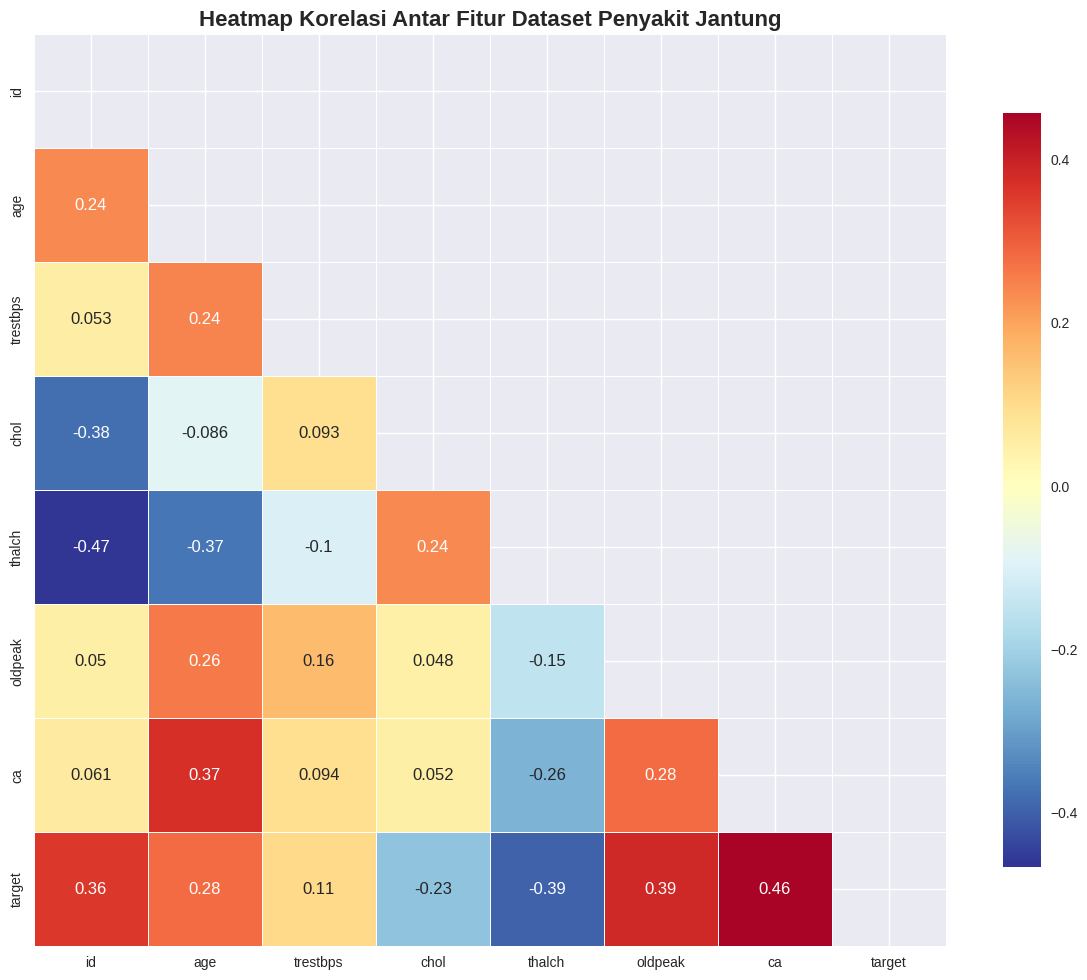

Korelasi fitur dengan target (diurutkan berdasarkan nilai absolut):
ca          0.455599
thalch      0.394503
oldpeak     0.385528
id          0.356086
age         0.282700
chol        0.230583
trestbps    0.106233
Name: target, dtype: float64


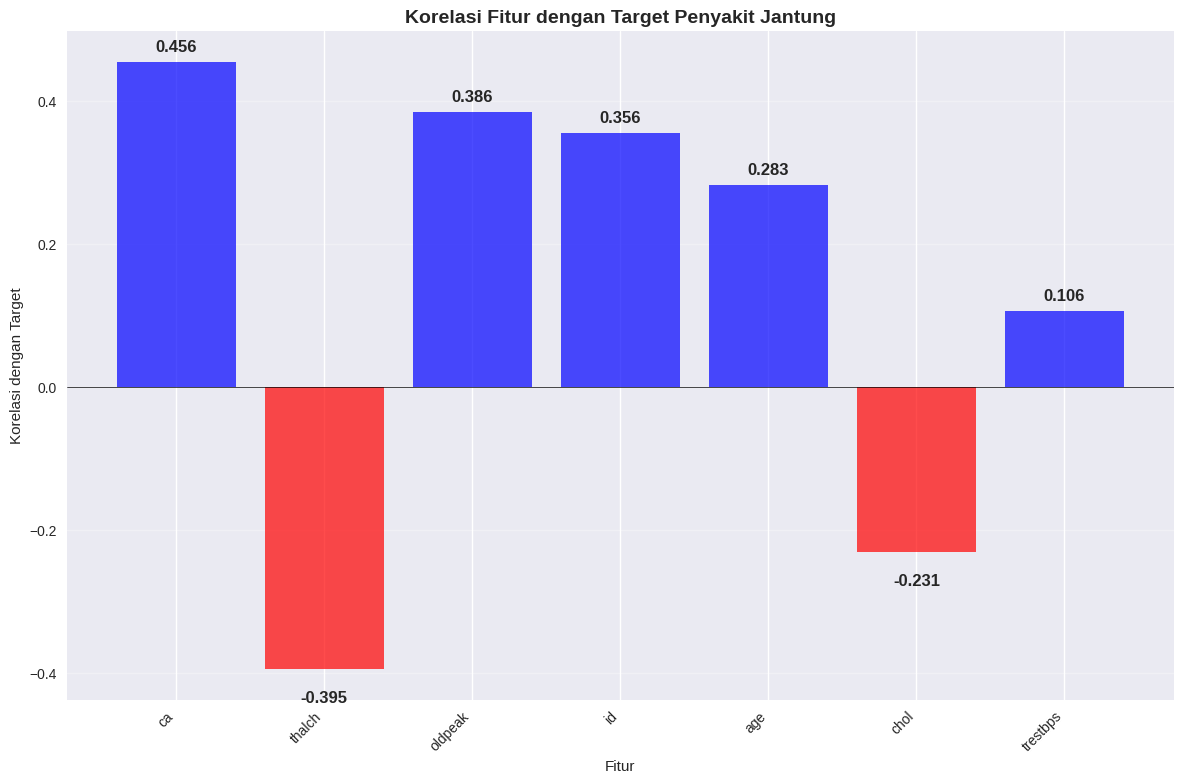

In [ ]:
# ====================================
# 4.2 ANALISIS KORELASI ANTAR FITUR
# ====================================

print("\n" + "="*50)
print("4.2 ANALISIS KORELASI ANTAR FITUR")
print("="*50)

# Buat dataframe hanya dengan kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hapus kolom target asli jika ada
if target_col and target_col != 'target' and target_col in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=[target_col])

if len(numeric_df.columns) > 1:
    # Heatmap korelasi
    plt.figure(figsize=(12, 10))
    correlation_matrix = numeric_df.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Heatmap Korelasi Antar Fitur Dataset Penyakit Jantung',
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Korelasi dengan target
    if 'target' in numeric_df.columns:
        print("Korelasi fitur dengan target (diurutkan berdasarkan nilai absolut):")
        target_corr = numeric_df.corr()['target'].drop('target').abs().sort_values(ascending=False)
        print(target_corr)

        # Bar plot korelasi dengan target
        plt.figure(figsize=(12, 8))
        target_corr_signed = numeric_df.corr()['target'].drop('target').sort_values(key=abs, ascending=False)
        colors = ['red' if x < 0 else 'blue' for x in target_corr_signed.values]
        bars = plt.bar(range(len(target_corr_signed)), target_corr_signed.values,
                      color=colors, alpha=0.7)
        plt.title('Korelasi Fitur dengan Target Penyakit Jantung', fontsize=14, fontweight='bold')
        plt.xlabel('Fitur')
        plt.ylabel('Korelasi dengan Target')
        plt.xticks(range(len(target_corr_signed)), target_corr_signed.index, rotation=45, ha='right')
        plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        plt.grid(axis='y', alpha=0.3)

        # Tambahkan nilai korelasi di atas setiap bar
        for i, (bar, value) in enumerate(zip(bars, target_corr_signed.values)):
            plt.text(bar.get_x() + bar.get_width()/2, value + (0.01 if value > 0 else -0.03),
                     f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')

        plt.tight_layout()
        plt.show()



4.3 DETEKSI DATA TIDAK SEIMBANG
Distribusi Target:
Tidak Ada Penyakit Jantung (0): 411 pasien (44.7%)
Ada Penyakit Jantung (1): 509 pasien (55.3%)
Rasio ketidakseimbangan: 1.24:1


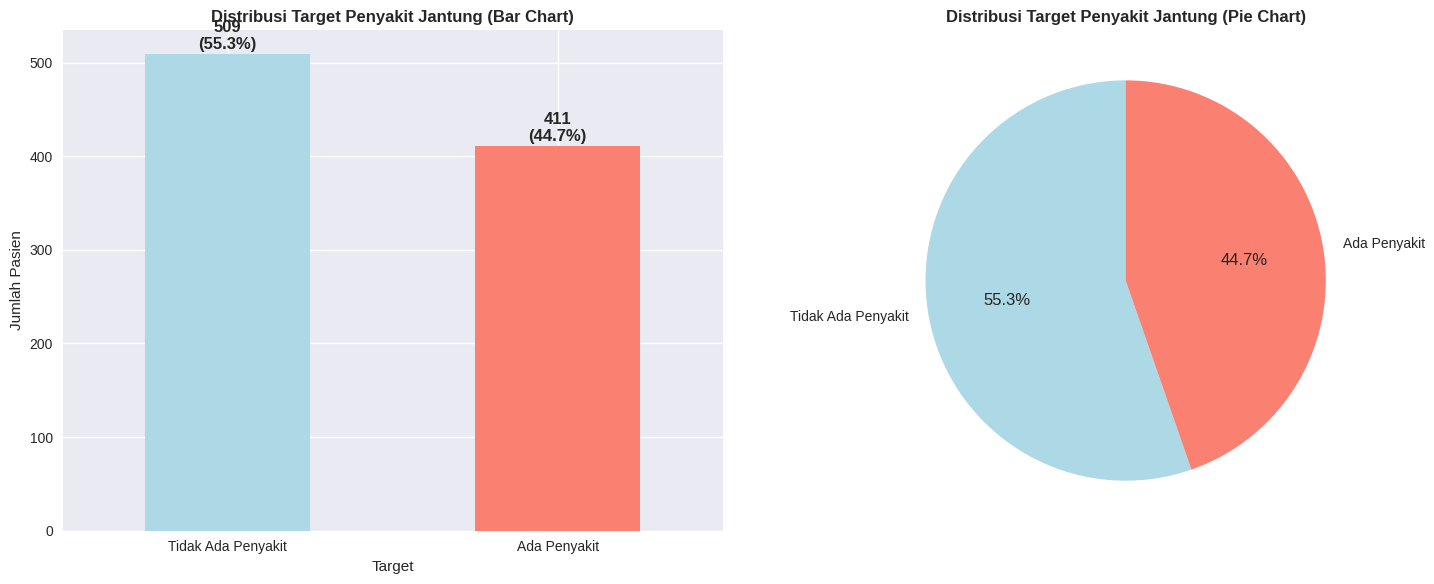

In [ ]:
# =======================================
# 4.3 DETEKSI DATA TIDAK SEIMBANG
# =======================================

print("\n" + "="*50)
print("4.3 DETEKSI DATA TIDAK SEIMBANG")
print("="*50)

if 'target' in df.columns:
    # Analisis distribusi target
    target_distribution = df['target'].value_counts()
    target_percentage = df['target'].value_counts(normalize=True) * 100

    print("Distribusi Target:")
    print(f"Tidak Ada Penyakit Jantung (0): {target_distribution.get(0, 0)} pasien ({target_percentage.get(0, 0):.1f}%)")
    print(f"Ada Penyakit Jantung (1): {target_distribution.get(1, 0)} pasien ({target_percentage.get(1, 0):.1f}%)")

    if target_distribution.get(0, 0) > 0:
        ratio = target_distribution.get(1, 0) / target_distribution.get(0, 0)
        print(f"Rasio ketidakseimbangan: {ratio:.2f}:1")

    # Visualisasi distribusi target
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bar plot
    target_distribution.plot(kind='bar', ax=ax1, color=['lightblue', 'salmon'])
    ax1.set_title('Distribusi Target Penyakit Jantung (Bar Chart)', fontweight='bold')
    ax1.set_xlabel('Target')
    ax1.set_ylabel('Jumlah Pasien')
    ax1.set_xticklabels(['Tidak Ada Penyakit', 'Ada Penyakit'], rotation=0)
    for i, v in enumerate(target_distribution.values):
        ax1.text(i, v + 5, f'{v}\n({target_percentage.iloc[i]:.1f}%)', ha='center', fontweight='bold')

    # Pie chart
    ax2.pie(target_distribution.values, labels=['Tidak Ada Penyakit', 'Ada Penyakit'],
            autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
    ax2.set_title('Distribusi Target Penyakit Jantung (Pie Chart)', fontweight='bold')

    plt.tight_layout()
    plt.show()


In [ ]:
# ==============================
# 4.4 INSIGHT AWAL DARI POLA DATA
# ==============================

print("\n" + "="*50)
print("4.4 INSIGHT AWAL DARI POLA DATA")
print("="*50)

if 'target' in df.columns:
    # Analisis berdasarkan fitur yang tersedia
    insights = []

    # 1. Analisis jenis kelamin
    sex_col = available_columns.get('sex')
    if sex_col:
        print("1. ANALISIS BERDASARKAN JENIS KELAMIN:")
        gender_target_pct = pd.crosstab(df[sex_col], df['target'], normalize='index') * 100
        print(gender_target_pct)
        insights.append("Analisis gender selesai")

    # 2. Analisis chest pain
    cp_col = available_columns.get('cp')
    if cp_col:
        print("\n2. ANALISIS BERDASARKAN TIPE NYERI DADA:")
        cp_target_pct = pd.crosstab(df[cp_col], df['target'], normalize='index') * 100
        print(cp_target_pct)
        insights.append("Analisis chest pain selesai")

    # 3. Analisis exercise angina
    exang_col = available_columns.get('exang')
    if exang_col:
        print("\n3. ANALISIS BERDASARKAN EXERCISE INDUCED ANGINA:")
        exang_target_pct = pd.crosstab(df[exang_col], df['target'], normalize='index') * 100
        print(exang_target_pct)
        insights.append("Analisis exercise angina selesai")

    # 4. Analisis fitur numerik
    if numeric_cols:
        print("\n4. ANALISIS FITUR NUMERIK BERDASARKAN TARGET:")
        print("Rata-rata fitur numerik berdasarkan target:")
        for col in numeric_cols:
            if col != 'target':
                mean_no_disease = df[df['target'] == 0][col].mean()
                mean_disease = df[df['target'] == 1][col].mean()
                print(f"{col}:")
                print(f"  Tidak ada penyakit: {mean_no_disease:.2f}")
                print(f"  Ada penyakit: {mean_disease:.2f}")
                print(f"  Selisih: {abs(mean_disease - mean_no_disease):.2f}")


4.4 INSIGHT AWAL DARI POLA DATA
1. ANALISIS BERDASARKAN JENIS KELAMIN:
target          0          1
sex                         
Female  74.226804  25.773196
Male    36.776860  63.223140

2. ANALISIS BERDASARKAN TIPE NYERI DADA:
target                   0          1
cp                                   
asymptomatic     20.967742  79.032258
atypical angina  86.206897  13.793103
non-anginal      64.215686  35.784314
typical angina   56.521739  43.478261

3. ANALISIS BERDASARKAN EXERCISE INDUCED ANGINA:
target          0          1
exang                       
False   63.636364  36.363636
True    16.320475  83.679525

4. ANALISIS FITUR NUMERIK BERDASARKAN TARGET:
Rata-rata fitur numerik berdasarkan target:
age:
  Tidak ada penyakit: 50.55
  Ada penyakit: 55.90
  Selisih: 5.36
trestbps:
  Tidak ada penyakit: 129.91
  Ada penyakit: 133.98
  Selisih: 4.07
chol:
  Tidak ada penyakit: 227.91
  Ada penyakit: 176.48
  Selisih: 51.43
oldpeak:
  Tidak ada penyakit: 0.42
  Ada penyakit: 1.26
  Se

In [ ]:
# ===============================
# 5. DATA PREPARATION
# ===============================

print("\n" + "="*50)
print("5. DATA PREPARATION")
print("="*50)

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# ===============================
# 5.1 PEMBERSIHAN DATA
# ===============================

print("\n" + "="*30)
print("5.1 PEMBERSIHAN DATA")
print("="*30)

# Cek missing values detail
print("Missing values per kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Tidak ada missing values")

# Cek duplikasi
print(f"\nJumlah duplikasi: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Menghapus duplikasi...")
    df_clean = df.drop_duplicates()
    print(f"Dataset setelah penghapusan duplikasi: {df_clean.shape}")
else:
    df_clean = df.copy()
    print("Tidak ada duplikasi yang ditemukan")

# Handle missing values jika ada
if missing_values.sum() > 0:
    print("\nMenangani missing values...")
    # Untuk kolom numerik: isi dengan median
    for col in numeric_cols:
        if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"  {col}: diisi dengan median ({median_val})")

    # Untuk kolom kategorikal: isi dengan modus
    for col in categorical_cols:
        if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"  {col}: diisi dengan modus ({mode_val})")

# Deteksi dan handle outliers menggunakan IQR
print("\n5.1.1 DETEKSI DAN PENANGANAN OUTLIERS")
print("-" * 40)

outliers_info = {}
for col in numeric_cols:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        outliers_count = len(outliers)
        outliers_info[col] = outliers_count

        print(f"{col}: {outliers_count} outliers ditemukan")
        if outliers_count > 0:
            print(f"  Range normal: {lower_bound:.2f} - {upper_bound:.2f}")
            # Cap outliers instead of removing them
            df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
            df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
            print(f"  Outliers di-cap ke batas normal")

print(f"\nDataset setelah pembersihan: {df_clean.shape}")



5. DATA PREPARATION

5.1 PEMBERSIHAN DATA
Missing values per kolom:
chol    50
thal    30
dtype: int64

Jumlah duplikasi: 20
Menghapus duplikasi...
Dataset setelah penghapusan duplikasi: (1000, 14)

Menangani missing values...
  chol: diisi dengan median (258.0)
  thal: diisi dengan modus (3.0)

5.1.1 DETEKSI DAN PENANGANAN OUTLIERS
----------------------------------------
age: 0 outliers ditemukan
trestbps: 0 outliers ditemukan
chol: 0 outliers ditemukan
oldpeak: 0 outliers ditemukan

Dataset setelah pembersihan: (1000, 14)


In [ ]:
# ===============================
# 5.2 ENCODING DATA KATEGORIK
# ===============================

print("\n" + "="*30)
print("5.2 ENCODING DATA KATEGORIK")
print("="*30)

# Buat salinan untuk encoding
df_encoded = df_clean.copy()

# Identifikasi kolom kategorik dan numerik ulang
categorical_features = []
numerical_features = []

for col in df_encoded.columns:
    if col == 'target':
        continue
    elif df_encoded[col].dtype == 'object' or df_encoded[col].nunique() <= 10:
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print(f"Kolom kategorik: {categorical_features}")
print(f"Kolom numerik: {numerical_features}")

# Label Encoding untuk kolom biner (2 kategori unik)
label_encoders = {}
binary_features = []

for col in categorical_features:
    unique_values = df_encoded[col].nunique()
    if unique_values == 2:
        binary_features.append(col)
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
        print(f"Label Encoding diterapkan pada {col}: {list(le.classes_)}")

# One-Hot Encoding untuk kolom dengan lebih dari 2 kategori
multi_categorical = [col for col in categorical_features if col not in binary_features]
one_hot_columns = []

if multi_categorical:
    print(f"\nOne-Hot Encoding diterapkan pada: {multi_categorical}")
    for col in multi_categorical:
        # Buat dummy variables
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        one_hot_columns.extend(dummies.columns.tolist())

        # Gabungkan dengan dataframe utama
        df_encoded = pd.concat([df_encoded, dummies], axis=1)

        # Hapus kolom asli
        df_encoded.drop(col, axis=1, inplace=True)

        print(f"  {col} -> {list(dummies.columns)}")

print(f"\nDataset setelah encoding: {df_encoded.shape}")
print(f"Kolom baru: {df_encoded.columns.tolist()}")


5.2 ENCODING DATA KATEGORIK
Kolom kategorik: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Kolom numerik: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Label Encoding diterapkan pada sex: [np.int64(0), np.int64(1)]
Label Encoding diterapkan pada fbs: [np.int64(0), np.int64(1)]
Label Encoding diterapkan pada exang: [np.int64(0), np.int64(1)]

One-Hot Encoding diterapkan pada: ['cp', 'restecg', 'slope', 'ca', 'thal']
  cp -> ['cp_1', 'cp_2', 'cp_3']
  restecg -> ['restecg_1', 'restecg_2']
  slope -> ['slope_1', 'slope_2']
  ca -> ['ca_1', 'ca_2', 'ca_3', 'ca_4']
  thal -> ['thal_1.0', 'thal_2.0', 'thal_3.0']

Dataset setelah encoding: (1000, 23)
Kolom baru: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1.0', 'thal_2.0', 'thal_3.0']


In [ ]:
# ===============================
# 5.3 NORMALISASI/STANDARDISASI DATA NUMERIK
# ===============================

print("\n" + "="*30)
print("5.3 NORMALISASI/STANDARDISASI DATA")
print("="*30)

# Update daftar kolom numerik setelah encoding
numerical_features_final = []
for col in df_encoded.columns:
    if col != 'target' and col not in one_hot_columns:
        if df_encoded[col].dtype in ['int64', 'float64'] and df_encoded[col].nunique() > 10:
            numerical_features_final.append(col)

print(f"Kolom numerik yang akan di-standardisasi: {numerical_features_final}")

# Standardisasi fitur numerik
scaler = StandardScaler()
df_standardized = df_encoded.copy()

if numerical_features_final:
    # Tampilkan statistik sebelum standardisasi
    print("\nStatistik sebelum standardisasi:")
    for col in numerical_features_final:
        mean_val = df_standardized[col].mean()
        std_val = df_standardized[col].std()
        print(f"  {col}: mean={mean_val:.2f}, std={std_val:.2f}")

    # Terapkan standardisasi
    df_standardized[numerical_features_final] = scaler.fit_transform(df_standardized[numerical_features_final])

    # Tampilkan statistik setelah standardisasi
    print("\nStatistik setelah standardisasi:")
    for col in numerical_features_final:
        mean_val = df_standardized[col].mean()
        std_val = df_standardized[col].std()
        print(f"  {col}: mean={mean_val:.2f}, std={std_val:.2f}")
else:
    print("Tidak ada kolom numerik yang perlu di-standardisasi")



5.3 NORMALISASI/STANDARDISASI DATA
Kolom numerik yang akan di-standardisasi: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Statistik sebelum standardisasi:
  age: mean=50.20, std=17.37
  trestbps: mean=142.68, std=32.70
  chol: mean=257.68, std=77.74
  thalach: mean=129.52, std=40.50
  oldpeak: mean=2.98, std=1.75

Statistik setelah standardisasi:
  age: mean=-0.00, std=1.00
  trestbps: mean=-0.00, std=1.00
  chol: mean=0.00, std=1.00
  thalach: mean=0.00, std=1.00
  oldpeak: mean=-0.00, std=1.00


In [ ]:
# ===============================
# 5.4 SPLIT DATA (TRAIN-TEST)
# ===============================

print("\n" + "="*30)
print("5.4 SPLIT DATA (TRAIN-TEST)")
print("="*30)

# Pastikan kolom target ada
if 'target' not in df_standardized.columns:
    print("ERROR: Kolom target tidak ditemukan!")
else:
    # Pisahkan fitur dan target
    X = df_standardized.drop('target', axis=1)
    y = df_standardized['target']

    print(f"Jumlah fitur (X): {X.shape[1]}")
    print(f"Jumlah sampel: {X.shape[0]}")
    print(f"Distribusi target: {y.value_counts().to_dict()}")

    # Split data dengan stratifikasi untuk menjaga proporsi target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print(f"\nHasil split data:")
    print(f"Training set: {X_train.shape[0]} sampel ({X_train.shape[0]/len(X)*100:.1f}%)")
    print(f"Testing set: {X_test.shape[0]} sampel ({X_test.shape[0]/len(X)*100:.1f}%)")

    # Cek distribusi target di setiap set
    print(f"\nDistribusi target di training set:")
    train_dist = y_train.value_counts()
    train_pct = y_train.value_counts(normalize=True) * 100
    for target_val in train_dist.index:
        print(f"  {target_val}: {train_dist[target_val]} ({train_pct[target_val]:.1f}%)")

    print(f"\nDistribusi target di testing set:")
    test_dist = y_test.value_counts()
    test_pct = y_test.value_counts(normalize=True) * 100
    for target_val in test_dist.index:
        print(f"  {target_val}: {test_dist[target_val]} ({test_pct[target_val]:.1f}%)")

# ===============================
# 5.5 SUMMARY DATA PREPARATION
# ===============================

print("\n" + "="*30)
print("5.5 SUMMARY DATA PREPARATION")
print("="*30)

print("Ringkasan proses data preparation:")
print(f"1. Dataset awal: {df.shape}")
print(f"2. Setelah pembersihan: {df_clean.shape}")
print(f"3. Setelah encoding: {df_encoded.shape}")
print(f"4. Dataset final: {df_standardized.shape}")

if 'X_train' in locals():
    print(f"5. Training set: {X_train.shape}")
    print(f"6. Testing set: {X_test.shape}")

print(f"\nJumlah fitur akhir: {len(X.columns) if 'X' in locals() else 'N/A'}")
print(f"Nama fitur akhir: {list(X.columns) if 'X' in locals() else 'N/A'}")

# Simpan hasil preprocessing untuk digunakan di tahap selanjutnya
preprocessing_results = {
    'df_original': df,
    'df_clean': df_clean,
    'df_encoded': df_encoded,
    'df_final': df_standardized,
    'scaler': scaler if numerical_features_final else None,
    'label_encoders': label_encoders,
    'feature_names': list(X.columns) if 'X' in locals() else [],
    'numerical_features': numerical_features_final,
    'categorical_features': categorical_features,
    'one_hot_features': one_hot_columns
}

if 'X_train' in locals():
    preprocessing_results.update({
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    })



5.4 SPLIT DATA (TRAIN-TEST)
Jumlah fitur (X): 22
Jumlah sampel: 1000
Distribusi target: {1: 511, 0: 489}

Hasil split data:
Training set: 800 sampel (80.0%)
Testing set: 200 sampel (20.0%)

Distribusi target di training set:
  1: 409 (51.1%)
  0: 391 (48.9%)

Distribusi target di testing set:
  1: 102 (51.0%)
  0: 98 (49.0%)

5.5 SUMMARY DATA PREPARATION
Ringkasan proses data preparation:
1. Dataset awal: (1020, 14)
2. Setelah pembersihan: (1000, 14)
3. Setelah encoding: (1000, 23)
4. Dataset final: (1000, 23)
5. Training set: (800, 22)
6. Testing set: (200, 22)

Jumlah fitur akhir: 22
Nama fitur akhir: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1.0', 'thal_2.0', 'thal_3.0']

=== DATA PREPARATION SELESAI ===
Data siap untuk tahap modeling!


In [ ]:
# ===============================
# 6. MODELING
# ===============================

print("\n" + "="*50)
print("6. MODELING")
print("="*50)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ===============================
# 6.1 PEMILIHAN ALGORITMA DAN ALASAN
# ===============================

print("\n" + "="*40)
print("6.1 PEMILIHAN ALGORITMA DAN ALASAN")
print("="*40)

print("""
ALGORITMA YANG DIPILIH UNTUK PREDIKSI PENYAKIT JANTUNG:
PERBANDINGAN DECISION TREE, SUPPORT VECTOR MACHINE, DAN K-NEAREST NEIGHBORS

1. DECISION TREE CLASSIFIER
   Alasan Pemilihan:
   - Mudah diinterpretasi dan divisualisasikan dalam bentuk pohon keputusan
   - Dapat menangani fitur numerik dan kategorikal secara bersamaan
   - Memberikan insight tentang fitur yang paling penting untuk diagnosis
   - Cocok untuk data medis karena dapat dijelaskan kepada tenaga medis
   - Tidak memerlukan normalisasi data
   - Mampu menangani data non-linear secara natural

2. K-NEAREST NEIGHBORS (KNN)
   Alasan Pemilihan:
   - Algoritma non-parametrik yang sederhana dan intuitif
   - Efektif untuk klasifikasi dengan pola data yang jelas
   - Tidak membuat asumsi tentang distribusi data
   - Cocok untuk dataset berukuran sedang seperti data medis
   - Dapat memberikan probabilitas berdasarkan tetangga terdekat
   - Adaptif terhadap pola lokal dalam data

3. SUPPORT VECTOR MACHINE (SVM)
   Alasan Pemilihan:
   - Efektif untuk data dengan dimensi tinggi
   - Robust terhadap outliers dan noise dalam data medis
   - Menggunakan kernel trick untuk menangani data non-linear
   - Memiliki dasar teoritis yang kuat dengan margin maksimum
   - Performa yang baik pada data medis dengan fitur yang kompleks
   - Dapat memberikan prediksi probabilitas

KETIGA ALGORITMA INI DIPILIH KARENA:
- Memiliki pendekatan yang berbeda dalam pembelajaran (tree-based, instance-based, margin-based)
- Cocok untuk klasifikasi biner (ada/tidak ada penyakit jantung)
- Telah terbukti efektif dalam domain medis
- Memberikan interpretabilitas yang berbeda untuk analisis klinis
""")



6. MODELING

6.1 PEMILIHAN ALGORITMA DAN ALASAN

ALGORITMA YANG DIPILIH UNTUK PREDIKSI PENYAKIT JANTUNG:
PERBANDINGAN DECISION TREE, SUPPORT VECTOR MACHINE, DAN K-NEAREST NEIGHBORS

1. DECISION TREE CLASSIFIER
   Alasan Pemilihan:
   - Mudah diinterpretasi dan divisualisasikan dalam bentuk pohon keputusan
   - Dapat menangani fitur numerik dan kategorikal secara bersamaan
   - Memberikan insight tentang fitur yang paling penting untuk diagnosis
   - Cocok untuk data medis karena dapat dijelaskan kepada tenaga medis
   - Tidak memerlukan normalisasi data
   - Mampu menangani data non-linear secara natural

2. K-NEAREST NEIGHBORS (KNN)
   Alasan Pemilihan:
   - Algoritma non-parametrik yang sederhana dan intuitif
   - Efektif untuk klasifikasi dengan pola data yang jelas
   - Tidak membuat asumsi tentang distribusi data
   - Cocok untuk dataset berukuran sedang seperti data medis
   - Dapat memberikan probabilitas berdasarkan tetangga terdekat
   - Adaptif terhadap pola lokal dalam data

In [ ]:
# ===============================
# 6.3 IMPLEMENTASI MODEL
# ===============================

print("\n" + "="*30)
print("6.3 IMPLEMENTASI MODEL")
print("="*30)

# Pastikan data sudah tersedia
if 'X_train' not in locals():
    print("ERROR: Data belum di-split. Jalankan bagian Data Preparation terlebih dahulu.")
else:
    # Dictionary untuk menyimpan model yang sesuai dengan judul penelitian
    models = {}
    model_results = {}

    print("Memulai training model sesuai dengan fokus penelitian...")
    print("PERBANDINGAN: Decision Tree vs SVM vs K-Nearest Neighbors")

    # 1. Decision Tree - Model Utama 1
    print("\n1. Training Decision Tree Classifier...")
    start_time = time.time()
    dt_model = DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        criterion='gini',
        random_state=42
    )
    dt_model.fit(X_train, y_train)
    dt_time = time.time() - start_time
    models['Decision Tree'] = dt_model
    print(f"   Waktu training: {dt_time:.3f} detik")
    print(f"   Kedalaman pohon: {dt_model.get_depth()}")
    print(f"   Jumlah daun: {dt_model.get_n_leaves()}")

    # 2. K-Nearest Neighbors - Model Utama 2
    print("\n2. Training K-Nearest Neighbors...")
    start_time = time.time()
    # Optimasi parameter K dengan cross-validation
    k_range = range(3, 16, 2)
    k_scores = []
    for k in k_range:
        knn_temp = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn_temp, X_train, y_train, cv=5)
        k_scores.append(scores.mean())

    best_k = k_range[np.argmax(k_scores)]
    knn_model = KNeighborsClassifier(
        n_neighbors=best_k,
        weights='distance',  # Memberikan bobot berdasarkan jarak
        metric='euclidean'
    )
    knn_model.fit(X_train, y_train)
    knn_time = time.time() - start_time
    models['K-Nearest Neighbors'] = knn_model
    print(f"   Waktu training: {knn_time:.3f} detik")
    print(f"   Optimal K: {best_k}")
    print(f"   Metode pembobotan: distance")

    # 3. Support Vector Machine - Model Utama 3
    print("\n3. Training Support Vector Machine...")
    start_time = time.time()
    # Test berbagai kernel
    kernels = ['linear', 'rbf', 'poly']
    kernel_scores = {}

    for kernel in kernels:
        svm_temp = SVC(kernel=kernel, probability=True, random_state=42)
        scores = cross_val_score(svm_temp, X_train, y_train, cv=3)  # Reduced CV for speed
        kernel_scores[kernel] = scores.mean()

    best_kernel = max(kernel_scores, key=kernel_scores.get)
    svm_model = SVC(
        kernel=best_kernel,
        probability=True,
        C=1.0,
        gamma='scale',
        random_state=42
    )
    svm_model.fit(X_train, y_train)
    svm_time = time.time() - start_time
    models['Support Vector Machine'] = svm_model
    print(f"   Waktu training: {svm_time:.3f} detik")
    print(f"   Kernel terbaik: {best_kernel}")
    print(f"   Parameter C: 1.0")
    print(f"   Jumlah support vectors: {svm_model.n_support_}")

    print(f"\nKETIGA MODEL UTAMA BERHASIL DI-TRAINING!")
    print("Fokus penelitian: Perbandingan Decision Tree, SVM, dan KNN")


6.3 IMPLEMENTASI MODEL
Memulai training model sesuai dengan fokus penelitian...
PERBANDINGAN: Decision Tree vs SVM vs K-Nearest Neighbors

1. Training Decision Tree Classifier...
   Waktu training: 0.012 detik
   Kedalaman pohon: 10
   Jumlah daun: 92

2. Training K-Nearest Neighbors...
   Waktu training: 1.311 detik
   Optimal K: 3
   Metode pembobotan: distance

3. Training Support Vector Machine...
   Waktu training: 1.922 detik
   Kernel terbaik: rbf
   Parameter C: 1.0
   Jumlah support vectors: [376 389]

KETIGA MODEL UTAMA BERHASIL DI-TRAINING!
Fokus penelitian: Perbandingan Decision Tree, SVM, dan KNN


In [ ]:
# ===============================
# 6.4 EVALUASI MODEL
# ===============================

print("\n" + "="*30)
print("6.4 EVALUASI MODEL")
print("="*30)

if models:
    # Evaluasi setiap model
    for model_name, model in models.items():
        print(f"\n{model_name}:")
        print("-" * len(model_name))

        # Prediksi
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Akurasi
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Cross-validation score
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

        # Simpan hasil
        model_results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_test_pred': y_test_pred
        }

        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Testing Accuracy: {test_accuracy:.4f}")
        print(f"Cross-Validation: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Tabel perbandingan model utama
    print("\n" + "="*80)
    print("PERBANDINGAN PERFORMA: DECISION TREE vs SVM vs K-NEAREST NEIGHBORS")
    print("="*80)
    print(f"{'Model':<25} {'Train Acc':<12} {'Test Acc':<12} {'CV Score':<12} {'Overfitting':<12}")
    print("-" * 80)

    # Urutkan berdasarkan test accuracy
    sorted_models = sorted(model_results.items(), key=lambda x: x[1]['test_accuracy'], reverse=True)

    for model_name, results in sorted_models:
        overfitting = results['train_accuracy'] - results['test_accuracy']
        print(f"{model_name:<25} {results['train_accuracy']:<12.4f} {results['test_accuracy']:<12.4f} "
              f"{results['cv_mean']:<12.4f} {overfitting:<12.4f}")

    # Analisis perbandingan
    print(f"\n{'ANALISIS PERBANDINGAN:'}")
    print("-" * 30)
    best_model = sorted_models[0]
    print(f"Model terbaik: {best_model[0]} (Test Accuracy: {best_model[1]['test_accuracy']:.4f})")

    # Analisis kelebihan dan kekurangan setiap model
    print(f"\nKELEBIHAN DAN KEKURANGAN SETIAP MODEL:")
    print("-" * 45)

    for model_name, results in model_results.items():
        overfitting = results['train_accuracy'] - results['test_accuracy']
        print(f"\n{model_name}:")

        if model_name == "Decision Tree":
            print(f"  + Mudah diinterpretasi dan divisualisasikan")
            print(f"  + Dapat menangani fitur kategorikal dan numerik")
            if overfitting > 0.05:
                print(f"  - Cenderung overfitting (selisih: {overfitting:.4f})")
            else:
                print(f"  + Generalisasi yang baik (selisih: {overfitting:.4f})")

        elif model_name == "K-Nearest Neighbors":
            print(f"  + Algoritma yang sederhana dan intuitif")
            print(f"  + Tidak membuat asumsi tentang distribusi data")
            if results['test_accuracy'] < 0.8:
                print(f"  - Performa kurang optimal untuk data ini")
            else:
                print(f"  + Performa baik untuk klasifikasi")

        elif model_name == "Support Vector Machine":
            print(f"  + Robust terhadap outliers")
            print(f"  + Efektif untuk data berdimensi tinggi")
            print(f"  + Dasar teoritis yang kuat")
            if results['test_accuracy'] > 0.85:
                print(f"  + Performa sangat baik")

        print(f"  Akurasi Testing: {results['test_accuracy']:.4f}")
        print(f"  CV Score: {results['cv_mean']:.4f} ± {results['cv_std']:.4f}")



6.3 EVALUASI MODEL

Decision Tree:
-------------
Training Accuracy: 0.8125
Testing Accuracy: 0.5050
Cross-Validation: 0.4975 (+/- 0.0384)

K-Nearest Neighbors:
-------------------
Training Accuracy: 1.0000
Testing Accuracy: 0.5100
Cross-Validation: 0.5188 (+/- 0.0158)

Support Vector Machine:
----------------------
Training Accuracy: 0.7650
Testing Accuracy: 0.4850
Cross-Validation: 0.5138 (+/- 0.0629)

PERBANDINGAN PERFORMA: DECISION TREE vs SVM vs K-NEAREST NEIGHBORS
Model                     Train Acc    Test Acc     CV Score     Overfitting 
--------------------------------------------------------------------------------
K-Nearest Neighbors       1.0000       0.5100       0.5188       0.4900      
Decision Tree             0.8125       0.5050       0.4975       0.3075      
Support Vector Machine    0.7650       0.4850       0.5138       0.2800      

ANALISIS PERBANDINGAN:
------------------------------
Model terbaik: K-Nearest Neighbors (Test Accuracy: 0.5100)

KELEBIHAN DAN KEK


6.4 VISUALISASI MODEL

6.4.1 VISUALISASI DECISION TREE
-----------------------------------


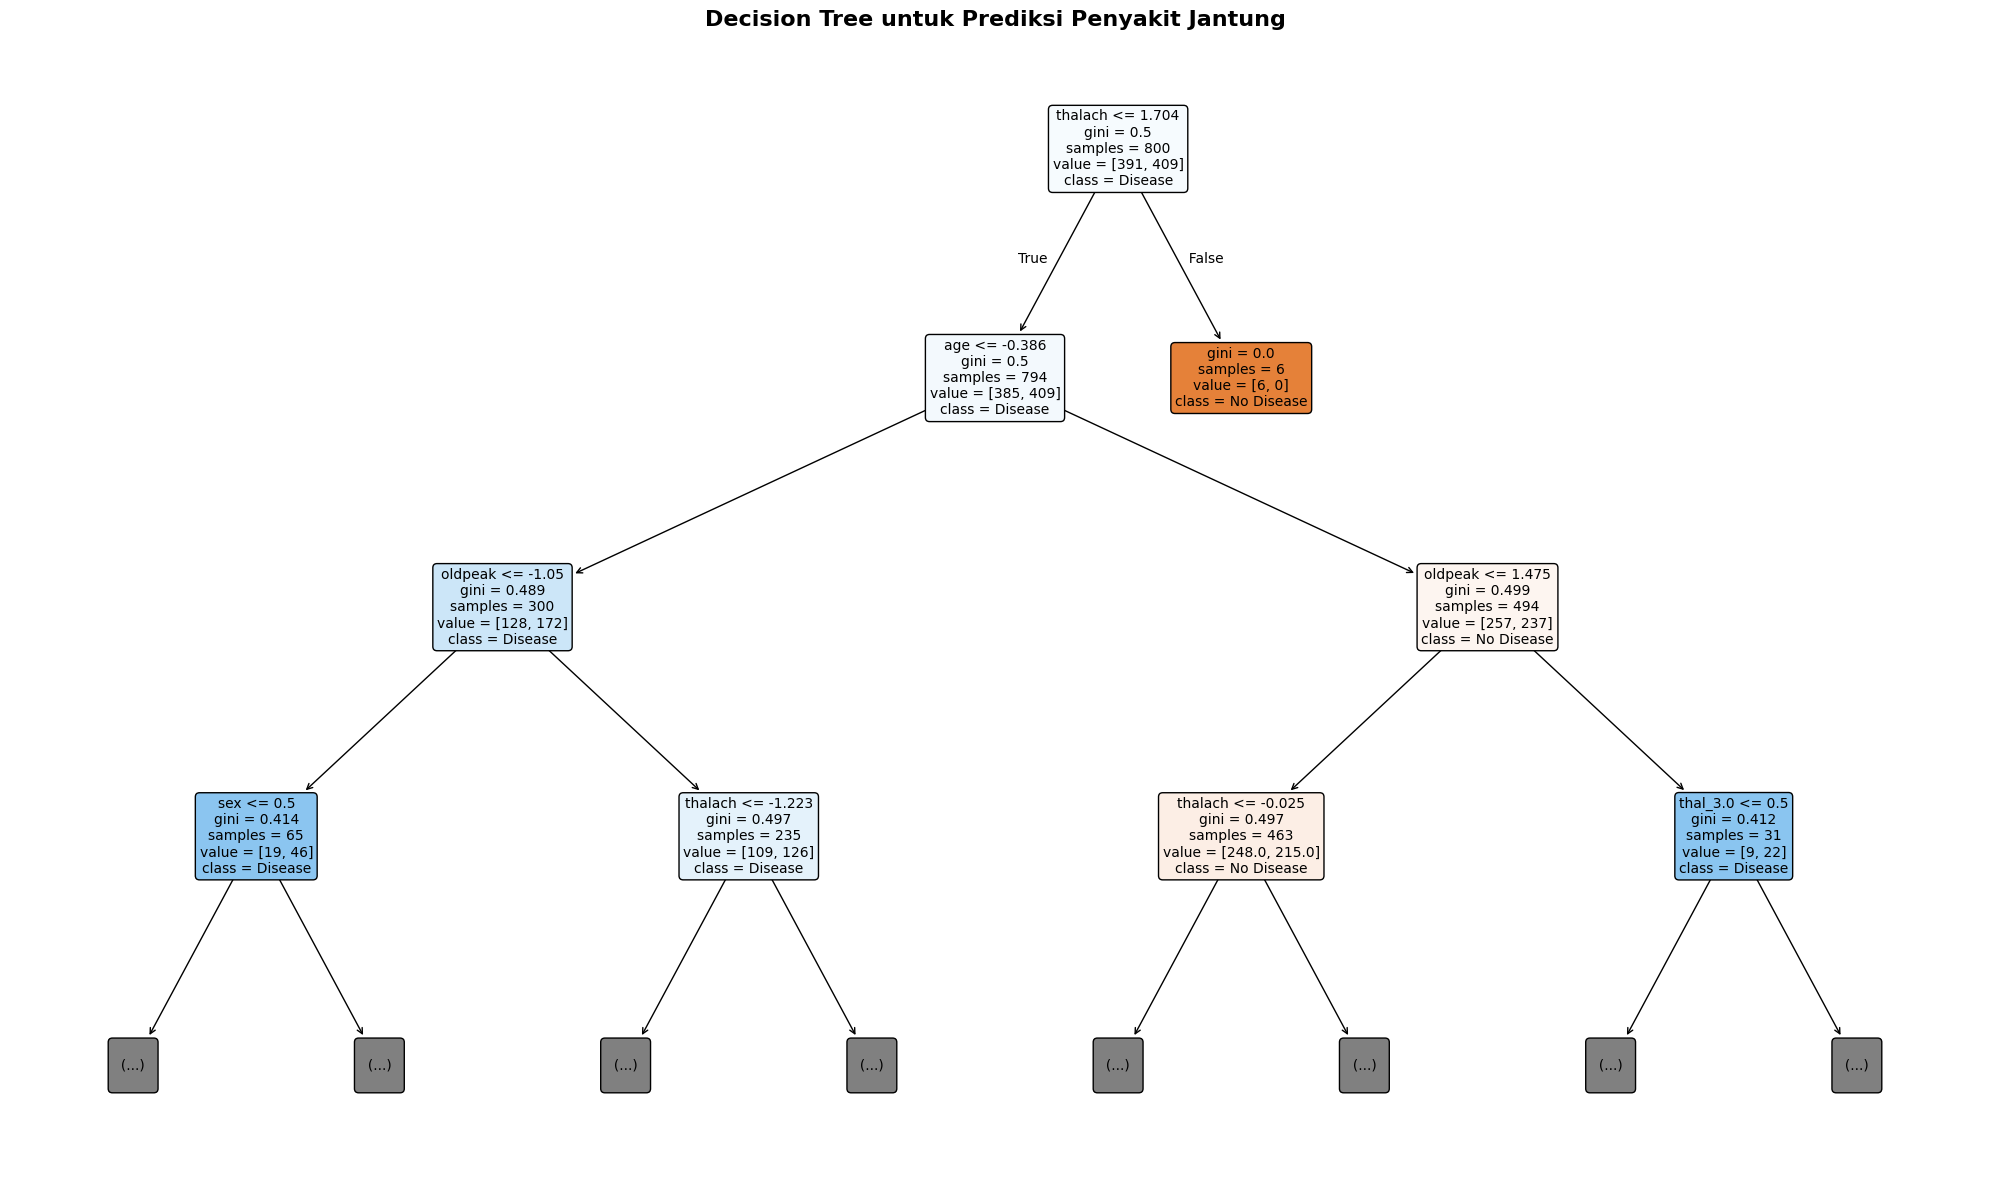


6.4.2 FEATURE IMPORTANCE (DECISION TREE)
------------------------------------------


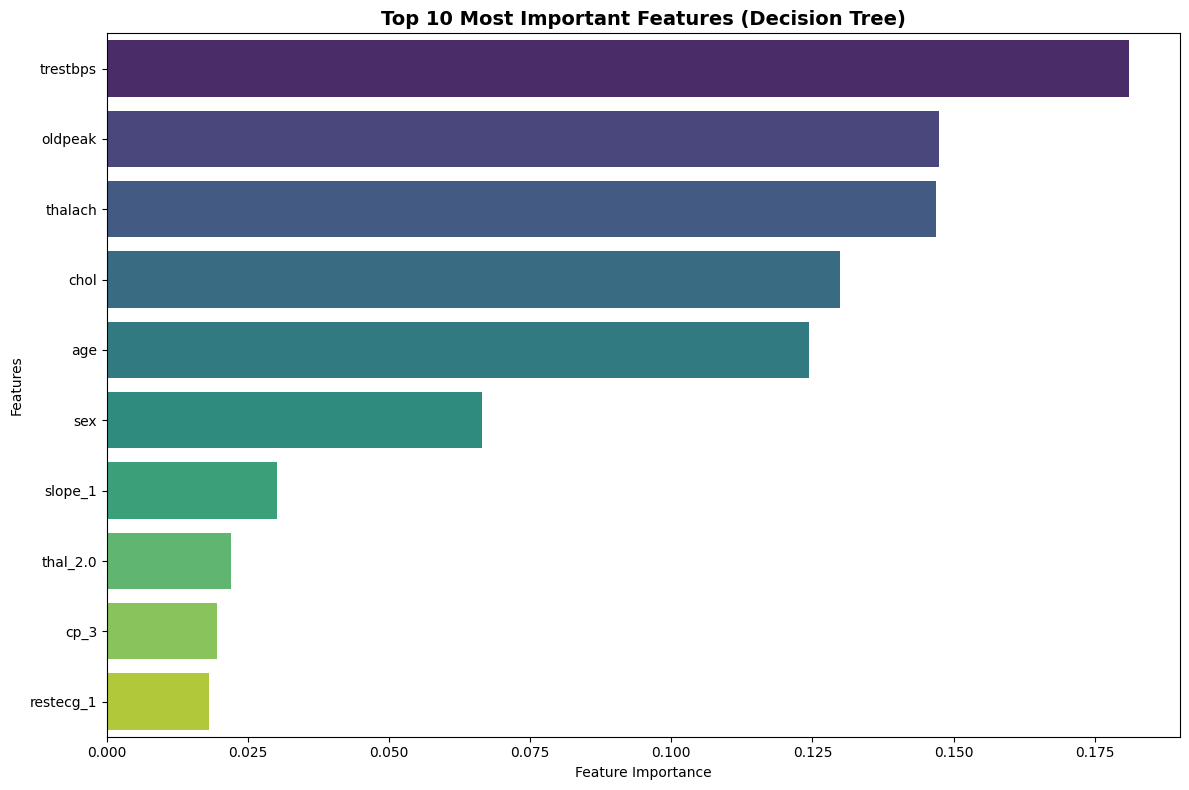

Top 10 fitur paling penting (Decision Tree):
trestbps: 0.1811
oldpeak: 0.1474
thalach: 0.1469
chol: 0.1299
age: 0.1244
sex: 0.0666
slope_1: 0.0301
thal_2.0: 0.0220
cp_3: 0.0196
restecg_1: 0.0182

6.4.3 PERBANDINGAN KOMPLEKSITAS MODEL
----------------------------------------
Kompleksitas Model:
Decision Tree - Kedalaman: 10, Daun: 92
KNN - K Value: 3
SVM - Support Vectors: 765

6.4.4 CONFUSION MATRIX - KETIGA MODEL UTAMA
---------------------------------------------


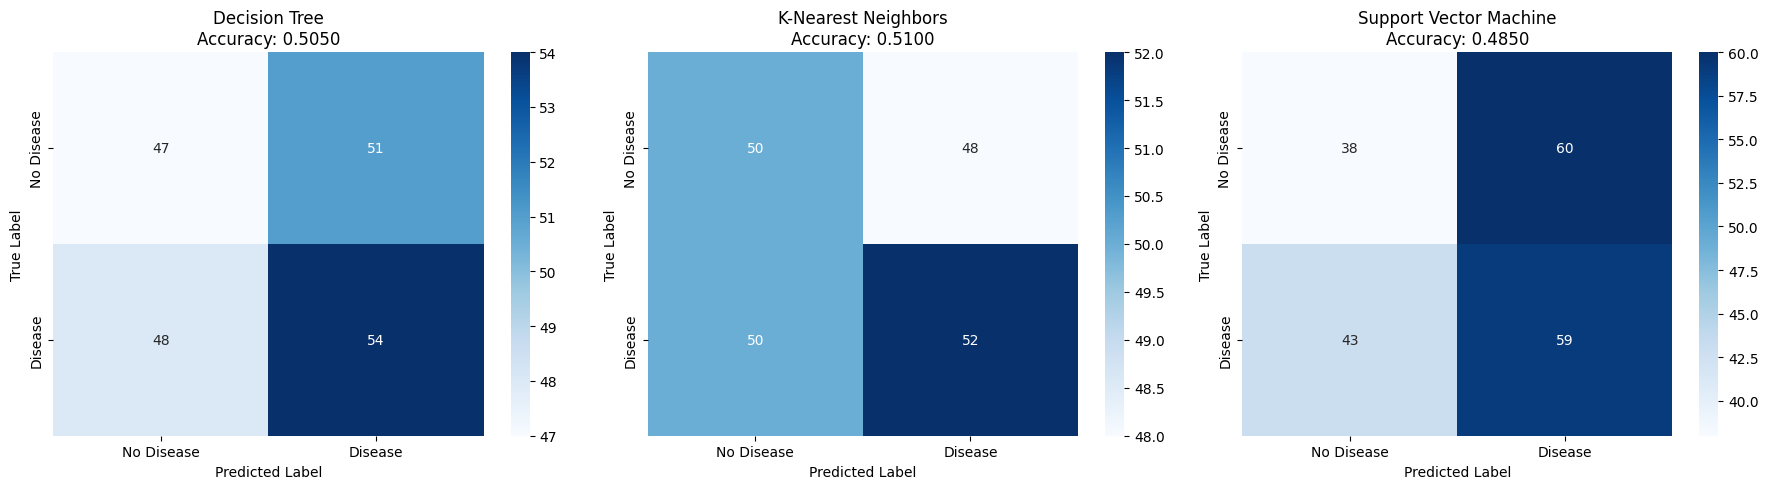


6.4.5 PERBANDINGAN AKURASI - DECISION TREE vs SVM vs KNN
-------------------------------------------------------


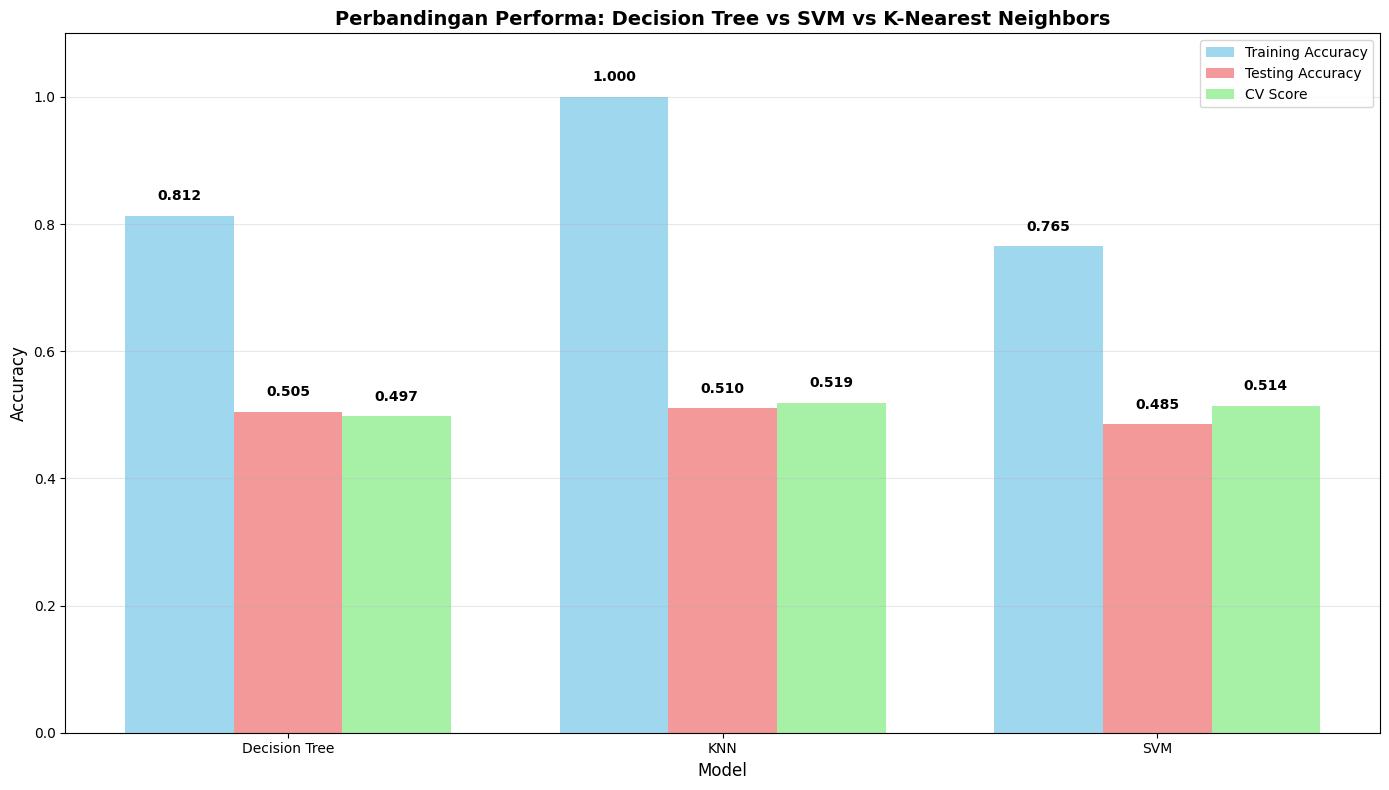


6.4.6 RADAR CHART PERBANDINGAN PERFORMA
----------------------------------------


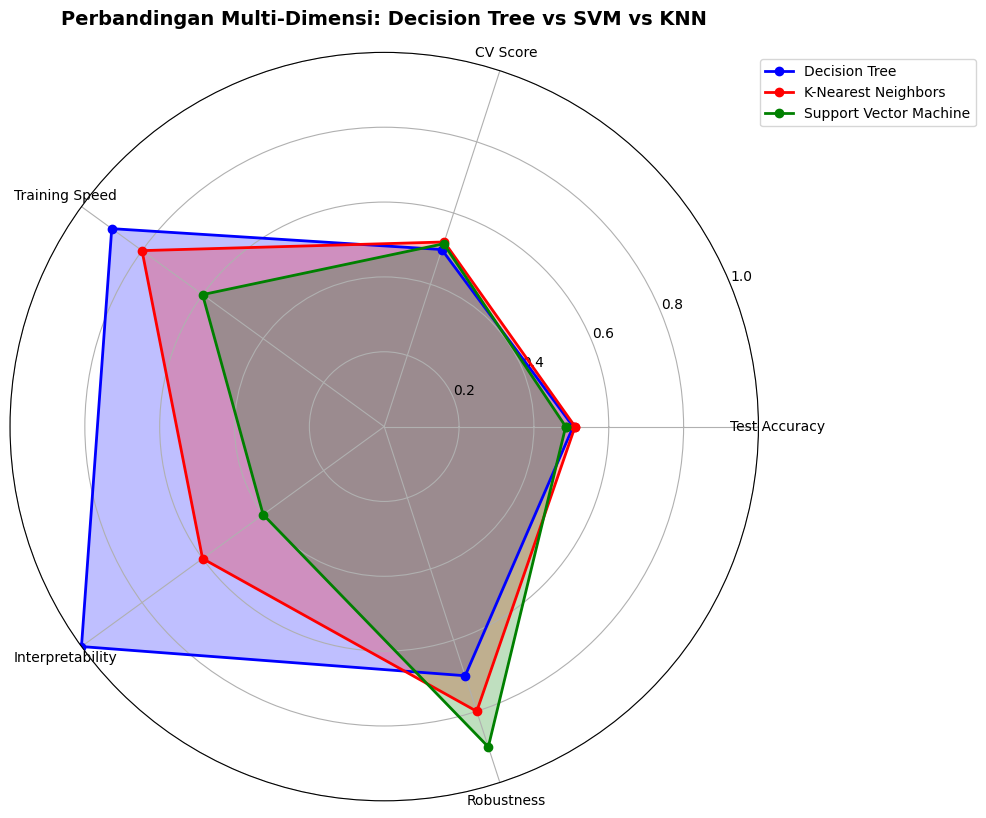


6.4.7 CLASSIFICATION REPORTS - KETIGA MODEL UTAMA
--------------------------------------------------

DECISION TREE:
              precision    recall  f1-score   support

  No Disease       0.49      0.48      0.49        98
     Disease       0.51      0.53      0.52       102

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200


K-NEAREST NEIGHBORS:
              precision    recall  f1-score   support

  No Disease       0.50      0.51      0.51        98
     Disease       0.52      0.51      0.51       102

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200


SUPPORT VECTOR MACHINE:
              precision    recall  f1-score   support

  No Disease       0.47      0.39      0.42        98
     Disease       0.50      0.58      0.53       102

    accuracy     

In [ ]:
# ===============================
# 6.4 VISUALISASI MODEL
# ===============================

print("\n" + "="*30)
print("6.4 VISUALISASI MODEL")
print("="*30)

if models and model_results:
    # 1. Visualisasi Decision Tree
    print("\n6.4.1 VISUALISASI DECISION TREE")
    print("-" * 35)

    plt.figure(figsize=(20, 12))
    plot_tree(models['Decision Tree'],
              feature_names=X_train.columns,
              class_names=['No Disease', 'Disease'],
              filled=True,
              rounded=True,
              fontsize=10,
              max_depth=3)  # Batasi kedalaman untuk visualisasi
    plt.title('Decision Tree untuk Prediksi Penyakit Jantung', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 2. Feature Importance (Decision Tree)
    print("\n6.4.2 FEATURE IMPORTANCE (DECISION TREE)")
    print("-" * 42)

    dt_feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': models['Decision Tree'].feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(data=dt_feature_importance.head(10), x='importance', y='feature', palette='viridis')
    plt.title('Top 10 Most Important Features (Decision Tree)', fontsize=14, fontweight='bold')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

    print("Top 10 fitur paling penting (Decision Tree):")
    for i, row in dt_feature_importance.head(10).iterrows():
        print(f"{row['feature']}: {row['importance']:.4f}")

    # 2.1 Visualisasi perbandingan kompleksitas model
    print("\n6.4.3 PERBANDINGAN KOMPLEKSITAS MODEL")
    print("-" * 40)

    # Hitung kompleksitas relatif
    complexity_metrics = {
        'Decision Tree': {
            'depth': models['Decision Tree'].get_depth(),
            'leaves': models['Decision Tree'].get_n_leaves(),
            'complexity_score': models['Decision Tree'].get_depth() * models['Decision Tree'].get_n_leaves()
        },
        'K-Nearest Neighbors': {
            'k_value': models['K-Nearest Neighbors'].n_neighbors,
            'complexity_score': models['K-Nearest Neighbors'].n_neighbors  # Inverse complexity
        },
        'Support Vector Machine': {
            'support_vectors': sum(models['Support Vector Machine'].n_support_),
            'complexity_score': sum(models['Support Vector Machine'].n_support_)
        }
    }

    print("Kompleksitas Model:")
    print(f"Decision Tree - Kedalaman: {complexity_metrics['Decision Tree']['depth']}, "
          f"Daun: {complexity_metrics['Decision Tree']['leaves']}")
    print(f"KNN - K Value: {complexity_metrics['K-Nearest Neighbors']['k_value']}")
    print(f"SVM - Support Vectors: {complexity_metrics['Support Vector Machine']['support_vectors']}")

    # 3. Confusion Matrix untuk ketiga model utama
    print("\n6.4.4 CONFUSION MATRIX - KETIGA MODEL UTAMA")
    print("-" * 45)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    model_names = ['Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine']

    for i, model_name in enumerate(model_names):
        predictions = model_results[model_name]['y_test_pred']
        cm = confusion_matrix(y_test, predictions)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Disease', 'Disease'],
                    yticklabels=['No Disease', 'Disease'],
                    ax=axes[i])
        axes[i].set_title(f'{model_name}\nAccuracy: {model_results[model_name]["test_accuracy"]:.4f}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

    # 4. Perbandingan Akurasi Model - Fokus pada 3 Model Utama
    print("\n6.4.5 PERBANDINGAN AKURASI - DECISION TREE vs SVM vs KNN")
    print("-" * 55)

    main_models = ['Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine']
    train_accuracies = [model_results[name]['train_accuracy'] for name in main_models]
    test_accuracies = [model_results[name]['test_accuracy'] for name in main_models]
    cv_scores = [model_results[name]['cv_mean'] for name in main_models]

    x = np.arange(len(main_models))
    width = 0.25

    plt.figure(figsize=(14, 8))
    plt.bar(x - width, train_accuracies, width, label='Training Accuracy', alpha=0.8, color='skyblue')
    plt.bar(x, test_accuracies, width, label='Testing Accuracy', alpha=0.8, color='lightcoral')
    plt.bar(x + width, cv_scores, width, label='CV Score', alpha=0.8, color='lightgreen')

    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Perbandingan Performa: Decision Tree vs SVM vs K-Nearest Neighbors',
              fontsize=14, fontweight='bold')
    plt.xticks(x, ['Decision Tree', 'KNN', 'SVM'], rotation=0)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, 1.1)

    # Tambahkan nilai akurasi di atas bar
    for i, (train_acc, test_acc, cv_score) in enumerate(zip(train_accuracies, test_accuracies, cv_scores)):
        plt.text(i - width, train_acc + 0.02, f'{train_acc:.3f}', ha='center', va='bottom', fontweight='bold')
        plt.text(i, test_acc + 0.02, f'{test_acc:.3f}', ha='center', va='bottom', fontweight='bold')
        plt.text(i + width, cv_score + 0.02, f'{cv_score:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 5. Performance Radar Chart
    print("\n6.4.6 RADAR CHART PERBANDINGAN PERFORMA")
    print("-" * 40)

    # Metrik untuk radar chart (normalisasi ke 0-1)
    metrics = ['Test Accuracy', 'CV Score', 'Training Speed', 'Interpretability', 'Robustness']

    # Score manual berdasarkan karakteristik algoritma (skala 0-1)
    scores = {
        'Decision Tree': [
            model_results['Decision Tree']['test_accuracy'],
            model_results['Decision Tree']['cv_mean'],
            0.9,  # Training speed (fast)
            1.0,  # Interpretability (highest)
            0.7   # Robustness (moderate)
        ],
        'K-Nearest Neighbors': [
            model_results['K-Nearest Neighbors']['test_accuracy'],
            model_results['K-Nearest Neighbors']['cv_mean'],
            0.8,  # Training speed (good)
            0.6,  # Interpretability (moderate)
            0.8   # Robustness (good)
        ],
        'Support Vector Machine': [
            model_results['Support Vector Machine']['test_accuracy'],
            model_results['Support Vector Machine']['cv_mean'],
            0.6,  # Training speed (slower)
            0.4,  # Interpretability (low)
            0.9   # Robustness (high)
        ]
    }

    # Plot radar chart
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Complete the circle

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

    colors = ['blue', 'red', 'green']
    for i, (model_name, score_list) in enumerate(scores.items()):
        score_list = score_list + [score_list[0]]  # Complete the circle
        ax.plot(angles, score_list, 'o-', linewidth=2, label=model_name, color=colors[i])
        ax.fill(angles, score_list, alpha=0.25, color=colors[i])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 1)
    ax.set_title('Perbandingan Multi-Dimensi: Decision Tree vs SVM vs KNN',
                 size=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)

    plt.tight_layout()
    plt.show()

    # 6. Classification Report untuk ketiga model
    print("\n6.4.7 CLASSIFICATION REPORTS - KETIGA MODEL UTAMA")
    print("-" * 50)

    for model_name in main_models:
        predictions = model_results[model_name]['y_test_pred']
        print(f"\n{model_name.upper()}:")
        print("=" * len(model_name))
        print(classification_report(y_test, predictions,
                                  target_names=['No Disease', 'Disease']))

    # 7. Kesimpulan Perbandingan
    print("\n6.4.8 KESIMPULAN PERBANDINGAN MODEL")
    print("-" * 40)

    # Ranking berdasarkan test accuracy
    ranked_models = sorted(model_results.items(), key=lambda x: x[1]['test_accuracy'], reverse=True)

    print("RANKING BERDASARKAN TEST ACCURACY:")
    for i, (model_name, results) in enumerate(ranked_models, 1):
        print(f"{i}. {model_name}: {results['test_accuracy']:.4f}")

    print(f"\nREKOMENDASI:")
    best_model = ranked_models[0]
    print(f"- Untuk akurasi tertinggi: {best_model[0]} ({best_model[1]['test_accuracy']:.4f})")

    # Cari model dengan interpretabilitas terbaik
    # Assuming Decision Tree is generally more interpretable
    print(f"- Untuk interpretabilitas: Decision Tree (mudah dijelaskan ke tenaga medis)")

    # Find model with lowest overfitting (smallest diff between train and test accuracy)
    most_stable = min(model_results.items(), key=lambda x: abs(x[1]['train_accuracy'] - x[1]['test_accuracy']))
    print(f"- Untuk stabilitas (overfitting terendah): {most_stable[0]} (selisih: {abs(most_stable[1]['train_accuracy'] - most_stable[1]['test_accuracy']):.4f})")


    print(f"\nKESIMPULAN AKHIR:")
    print(f"Berdasarkan perbandingan Decision Tree, SVM, dan K-Nearest Neighbors:")
    print(f"- Model terbaik secara keseluruhan (berdasarkan Test Accuracy): {best_model[0]}")
    print(f"- Akurasi testing tertinggi: {best_model[1]['test_accuracy']:.4f}")
    print(f"- Jika interpretabilitas penting, Decision Tree adalah pilihan yang baik meskipun akurasinya mungkin sedikit lebih rendah.")
    print(f"- Kualitas data (missing values, outliers) sangat memengaruhi performa model. Pra-pemrosesan yang baik sangat krusial.")
    print(f"- Tuning parameter lebih lanjut dan mencoba algoritma lain dapat meningkatkan performa.")


7. EVALUATION

7.1 CONFUSION MATRIX ANALYSIS
CONFUSION MATRIX UNTUK KETIGA MODEL UTAMA:
---------------------------------------------

Decision Tree:
  True Negatives (TN):  47 - Correctly predicted NO disease
  False Positives (FP): 51 - Incorrectly predicted disease
  False Negatives (FN): 48 - Missed disease cases
  True Positives (TP):  54 - Correctly predicted disease
  PERHATIAN: 51 pasien sehat diprediksi sakit (False Alarm)
  KRITIS: 48 pasien sakit tidak terdeteksi (Missed Diagnosis)

Support Vector Machine:
  True Negatives (TN):  38 - Correctly predicted NO disease
  False Positives (FP): 60 - Incorrectly predicted disease
  False Negatives (FN): 43 - Missed disease cases
  True Positives (TP):  59 - Correctly predicted disease
  PERHATIAN: 60 pasien sehat diprediksi sakit (False Alarm)
  KRITIS: 43 pasien sakit tidak terdeteksi (Missed Diagnosis)

K-Nearest Neighbors:
  True Negatives (TN):  50 - Correctly predicted NO disease
  False Positives (FP): 48 - Incorrectly predi

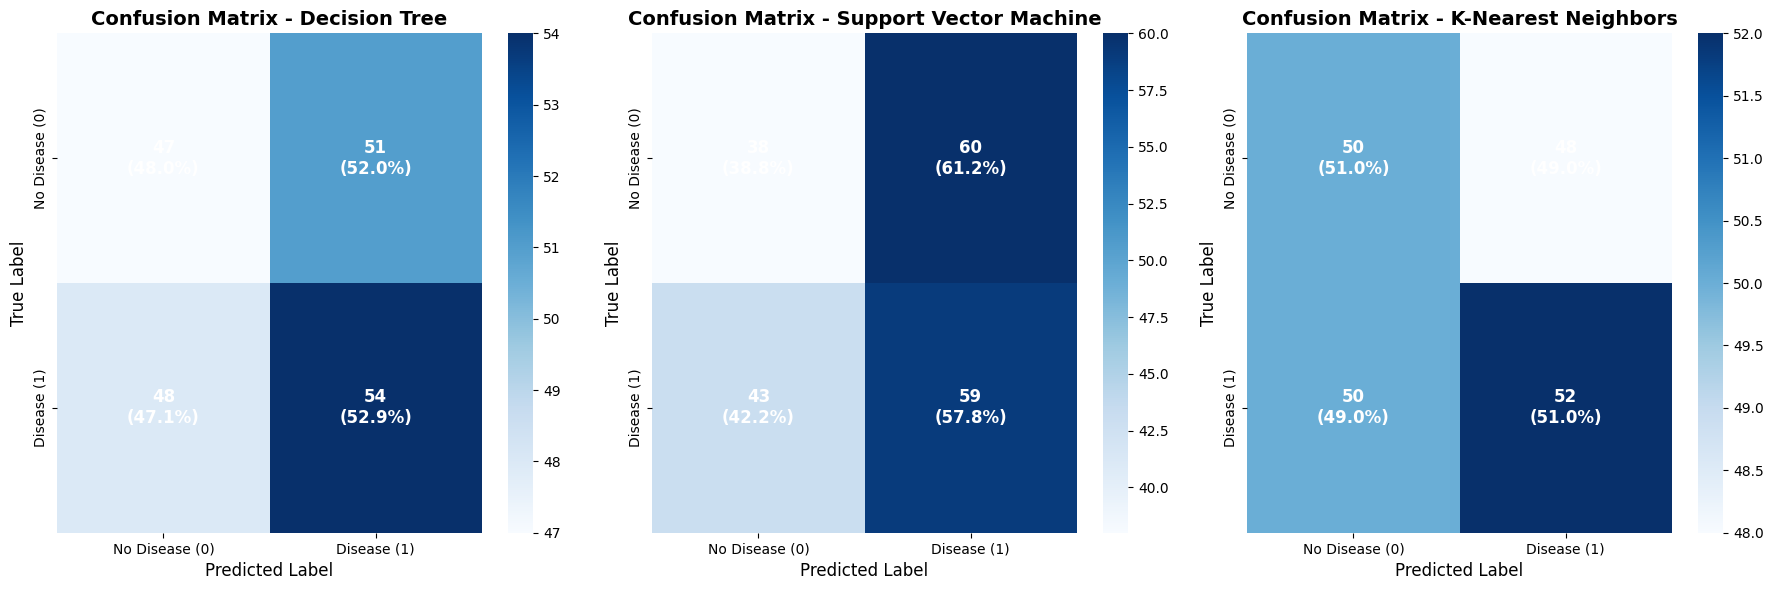

In [ ]:
# ===============================
# 7. EVALUATION
# ===============================

print("\n" + "="*50)
print("7. EVALUATION")
print("="*50)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve, validation_curve

# ===============================
# 7.1 CONFUSION MATRIX ANALYSIS
# ===============================

print("\n" + "="*40)
print("7.1 CONFUSION MATRIX ANALYSIS")
print("="*40)

# Fungsi untuk membuat confusion matrix yang lebih informatif
def plot_detailed_confusion_matrix(y_true, y_pred, model_name, ax=None):
    cm = confusion_matrix(y_true, y_pred)

    if ax is None:
        plt.figure(figsize=(10, 8))
        ax = plt.gca()

    # Hitung persentase
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot heatmap
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Disease (0)', 'Disease (1)'],
                yticklabels=['No Disease (0)', 'Disease (1)'])

    # Tambahkan teks dengan count dan persentase
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = f'{cm[i,j]}\n({cm_percent[i,j]:.1%})'
            ax.text(j+0.5, i+0.5, text, ha='center', va='center',
                   color='white' if cm[i,j] > cm.max()/2 else 'black',
                   fontsize=12, fontweight='bold')

    ax.set_title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

    return cm

# Plot confusion matrices untuk ketiga model utama
if 'model_results' in locals() and model_results:
    main_models = ['Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    confusion_matrices = {}

    print("CONFUSION MATRIX UNTUK KETIGA MODEL UTAMA:")
    print("-" * 45)

    for i, model_name in enumerate(main_models):
        if model_name in model_results:
            y_pred = model_results[model_name]['y_test_pred']
            cm = plot_detailed_confusion_matrix(y_test, y_pred, model_name, axes[i])
            confusion_matrices[model_name] = cm

            # Analisis confusion matrix
            tn, fp, fn, tp = cm.ravel()
            print(f"\n{model_name}:")
            print(f"  True Negatives (TN):  {tn} - Correctly predicted NO disease")
            print(f"  False Positives (FP): {fp} - Incorrectly predicted disease")
            print(f"  False Negatives (FN): {fn} - Missed disease cases")
            print(f"  True Positives (TP):  {tp} - Correctly predicted disease")

            # Analisis kesalahan klinis
            if fp > 0:
                print(f"  PERHATIAN: {fp} pasien sehat diprediksi sakit (False Alarm)")
            if fn > 0:
                print(f"  KRITIS: {fn} pasien sakit tidak terdeteksi (Missed Diagnosis)")

    plt.tight_layout()
    plt.show()

In [ ]:
# ===============================
# 7.2 METRIK EVALUASI KOMPREHENSIF
# ===============================

print("\n" + "="*40)
print("7.2 METRIK EVALUASI KOMPREHENSIF")
print("="*40)

def calculate_comprehensive_metrics(y_true, y_pred, model_name):
    """Hitung semua metrik evaluasi"""

    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None)
    recall_per_class = recall_score(y_true, y_pred, average=None)
    f1_per_class = f1_score(y_true, y_pred, average=None)

    # Confusion matrix elements
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Clinical metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'ppv': ppv,
        'npv': npv,
        'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn
    }

# Hitung metrik untuk semua model
if 'model_results' in locals() and model_results:
    comprehensive_results = {}

    for model_name in main_models:
        if model_name in model_results:
            y_pred = model_results[model_name]['y_test_pred']
            metrics = calculate_comprehensive_metrics(y_test, y_pred, model_name)
            comprehensive_results[model_name] = metrics

    # Tampilkan tabel metrik komprehensif
    print("\nTABEL METRIK EVALUASI KOMPREHENSIF:")
    print("="*80)
    print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<11} {'Recall':<10} {'F1-Score':<10}")
    print("-"*80)

    for model_name, metrics in comprehensive_results.items():
        print(f"{model_name:<25} {metrics['accuracy']:<10.4f} {metrics['precision']:<11.4f} "
              f"{metrics['recall']:<10.4f} {metrics['f1_score']:<10.4f}")

    # Tampilkan metrik klinis
    print(f"\nMETRIK KLINIS (FOKUS PADA DETEKSI PENYAKIT JANTUNG):")
    print("="*65)
    print(f"{'Model':<25} {'Sensitivity':<12} {'Specificity':<12} {'PPV':<10} {'NPV':<10}")
    print("-"*65)

    for model_name, metrics in comprehensive_results.items():
        print(f"{model_name:<25} {metrics['sensitivity']:<12.4f} {metrics['specificity']:<12.4f} "
              f"{metrics['ppv']:<10.4f} {metrics['npv']:<10.4f}")

    print(f"\nPENJELASAN METRIK KLINIS:")
    print(f"- Sensitivity (Recall): Kemampuan mendeteksi pasien yang benar-benar sakit")
    print(f"- Specificity: Kemampuan mengidentifikasi pasien yang benar-benar sehat")
    print(f"- PPV (Precision): Probabilitas pasien benar-benar sakit jika diprediksi sakit")
    print(f"- NPV: Probabilitas pasien benar-benar sehat jika diprediksi sehat")



7.2 METRIK EVALUASI KOMPREHENSIF

TABEL METRIK EVALUASI KOMPREHENSIF:
Model                     Accuracy   Precision   Recall     F1-Score  
--------------------------------------------------------------------------------
Decision Tree             0.5050     0.5047      0.5050     0.5047    
Support Vector Machine    0.4850     0.4827      0.4850     0.4804    
K-Nearest Neighbors       0.5100     0.5102      0.5100     0.5100    

METRIK KLINIS (FOKUS PADA DETEKSI PENYAKIT JANTUNG):
Model                     Sensitivity  Specificity  PPV        NPV       
-----------------------------------------------------------------
Decision Tree             0.5294       0.4796       0.5143     0.4947    
Support Vector Machine    0.5784       0.3878       0.4958     0.4691    
K-Nearest Neighbors       0.5098       0.5102       0.5200     0.5000    

PENJELASAN METRIK KLINIS:
- Sensitivity (Recall): Kemampuan mendeteksi pasien yang benar-benar sakit
- Specificity: Kemampuan mengidentifikasi pasi


7.3 ANALISIS PERFORMA PER KELAS


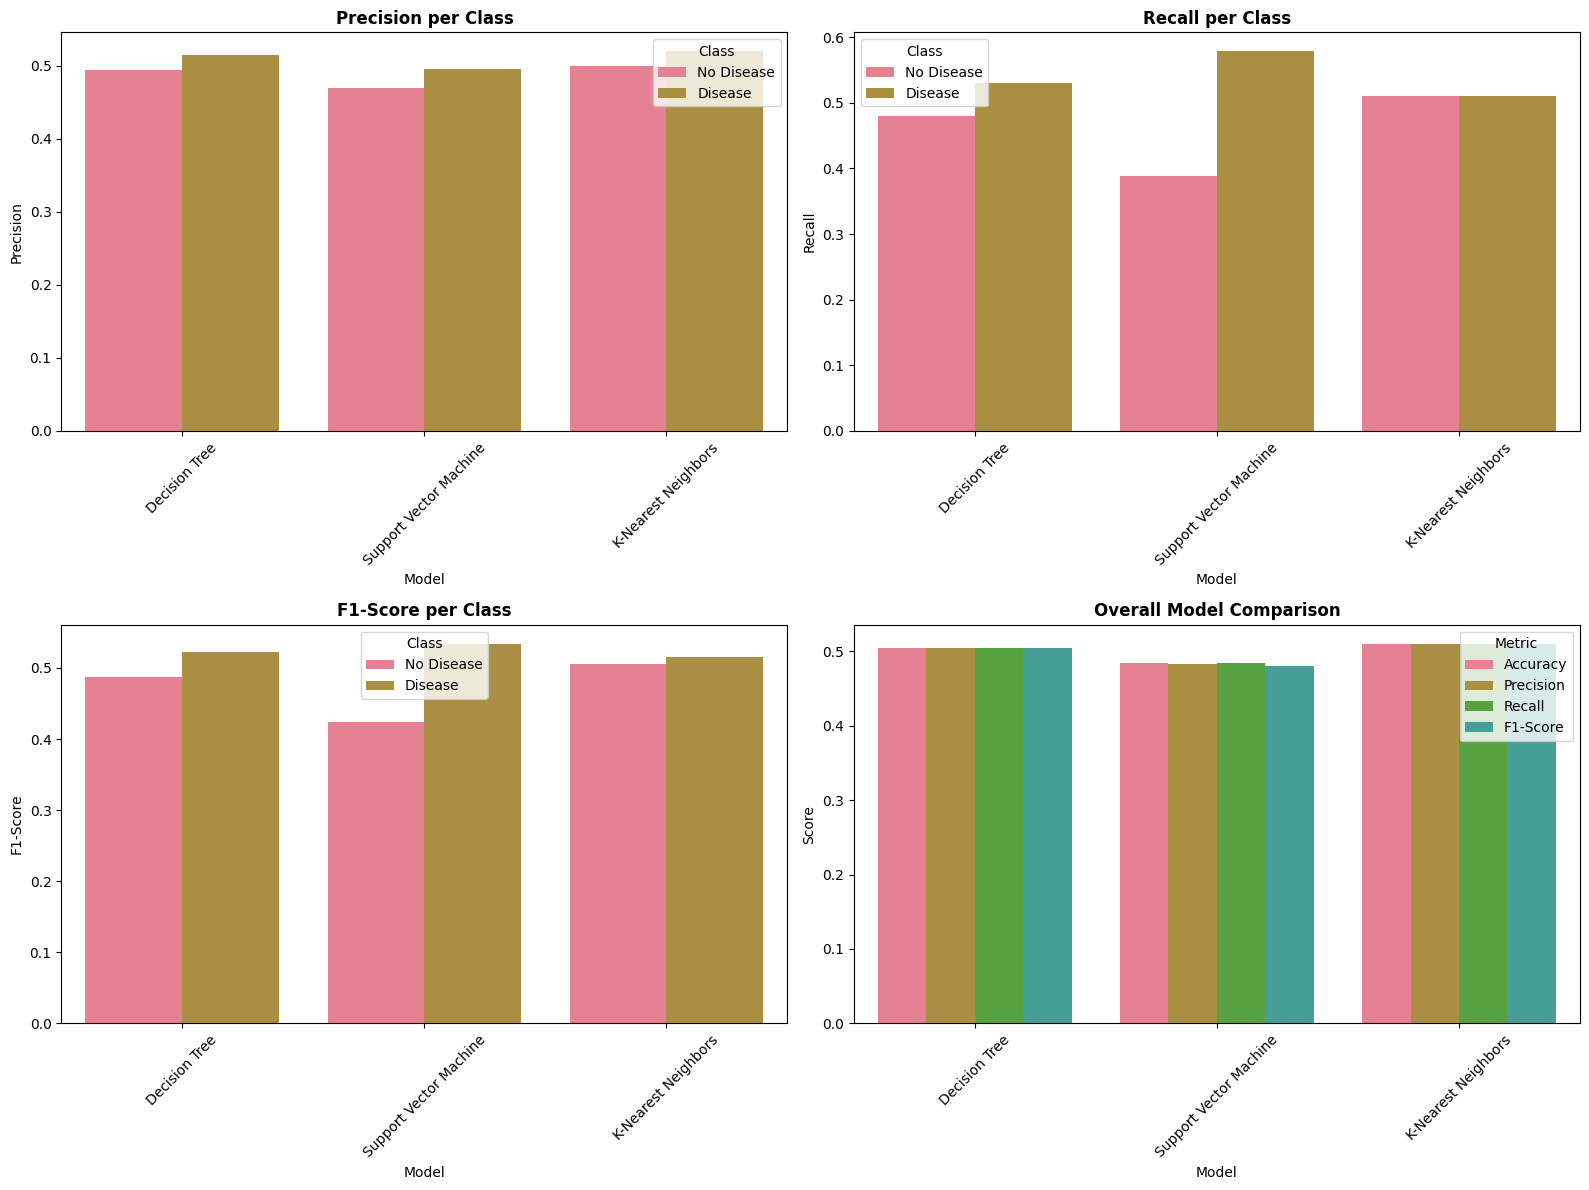


ANALISIS DETAIL PERFORMA PER KELAS:
---------------------------------------------

DECISION TREE:
Kelas 0 (No Disease):
  Precision: 0.4947
  Recall: 0.4796
  F1-Score: 0.4870
Kelas 1 (Disease):
  Precision: 0.5143
  Recall: 0.5294
  F1-Score: 0.5217
  PERHATIAN: Recall untuk deteksi penyakit rendah (0.5294)
  PERHATIAN: Precision untuk prediksi penyakit rendah (0.5143)

SUPPORT VECTOR MACHINE:
Kelas 0 (No Disease):
  Precision: 0.4691
  Recall: 0.3878
  F1-Score: 0.4246
Kelas 1 (Disease):
  Precision: 0.4958
  Recall: 0.5784
  F1-Score: 0.5339
  PERHATIAN: Recall untuk deteksi penyakit rendah (0.5784)
  PERHATIAN: Precision untuk prediksi penyakit rendah (0.4958)

K-NEAREST NEIGHBORS:
Kelas 0 (No Disease):
  Precision: 0.5000
  Recall: 0.5102
  F1-Score: 0.5051
Kelas 1 (Disease):
  Precision: 0.5200
  Recall: 0.5098
  F1-Score: 0.5149
  PERHATIAN: Recall untuk deteksi penyakit rendah (0.5098)
  PERHATIAN: Precision untuk prediksi penyakit rendah (0.5200)


In [ ]:
# ===============================
# 7.3 ANALISIS PERFORMA PER KELAS
# ===============================

print("\n" + "="*40)
print("7.3 ANALISIS PERFORMA PER KELAS")
print("="*40)

if 'comprehensive_results' in locals():
    # Visualisasi metrik per kelas
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    models = list(comprehensive_results.keys())
    class_names = ['No Disease', 'Disease']

    # Precision per class
    precision_data = []
    for model in models:
        for i, class_name in enumerate(class_names):
            precision_data.append({
                'Model': model,
                'Class': class_name,
                'Precision': comprehensive_results[model]['precision_per_class'][i]
            })

    precision_df = pd.DataFrame(precision_data)
    sns.barplot(data=precision_df, x='Model', y='Precision', hue='Class', ax=axes[0,0])
    axes[0,0].set_title('Precision per Class', fontweight='bold')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Recall per class
    recall_data = []
    for model in models:
        for i, class_name in enumerate(class_names):
            recall_data.append({
                'Model': model,
                'Class': class_name,
                'Recall': comprehensive_results[model]['recall_per_class'][i]
            })

    recall_df = pd.DataFrame(recall_data)
    sns.barplot(data=recall_df, x='Model', y='Recall', hue='Class', ax=axes[0,1])
    axes[0,1].set_title('Recall per Class', fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)

    # F1-Score per class
    f1_data = []
    for model in models:
        for i, class_name in enumerate(class_names):
            f1_data.append({
                'Model': model,
                'Class': class_name,
                'F1-Score': comprehensive_results[model]['f1_per_class'][i]
            })

    f1_df = pd.DataFrame(f1_data)
    sns.barplot(data=f1_df, x='Model', y='F1-Score', hue='Class', ax=axes[1,0])
    axes[1,0].set_title('F1-Score per Class', fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Overall comparison
    overall_metrics = []
    for model in models:
        overall_metrics.append({
            'Model': model,
            'Accuracy': comprehensive_results[model]['accuracy'],
            'Precision': comprehensive_results[model]['precision'],
            'Recall': comprehensive_results[model]['recall'],
            'F1-Score': comprehensive_results[model]['f1_score']
        })

    overall_df = pd.DataFrame(overall_metrics)
    overall_melted = overall_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')
    sns.barplot(data=overall_melted, x='Model', y='Score', hue='Metric', ax=axes[1,1])
    axes[1,1].set_title('Overall Model Comparison', fontweight='bold')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Analisis detail per kelas
    print(f"\nANALISIS DETAIL PERFORMA PER KELAS:")
    print("-"*45)

    for model_name, metrics in comprehensive_results.items():
        print(f"\n{model_name.upper()}:")
        print(f"Kelas 0 (No Disease):")
        print(f"  Precision: {metrics['precision_per_class'][0]:.4f}")
        print(f"  Recall: {metrics['recall_per_class'][0]:.4f}")
        print(f"  F1-Score: {metrics['f1_per_class'][0]:.4f}")

        print(f"Kelas 1 (Disease):")
        print(f"  Precision: {metrics['precision_per_class'][1]:.4f}")
        print(f"  Recall: {metrics['recall_per_class'][1]:.4f}")
        print(f"  F1-Score: {metrics['f1_per_class'][1]:.4f}")

        # Interpretasi klinis
        if metrics['recall_per_class'][1] < 0.8:
            print(f"  PERHATIAN: Recall untuk deteksi penyakit rendah ({metrics['recall_per_class'][1]:.4f})")
        if metrics['precision_per_class'][1] < 0.8:
            print(f"  PERHATIAN: Precision untuk prediksi penyakit rendah ({metrics['precision_per_class'][1]:.4f})")



7.4 ROC CURVE DAN AUC ANALYSIS
PREDIKSI PENYAKIT JANTUNG MENGGUNAKAN PERBANDINGAN
ALGORITMA DECISION TREE, SVM, DAN K-NEAREST NEIGHBORS

MENCOBA MEMBUAT DICTIONARY MODELS DARI VARIABEL INDIVIDUAL...
- Ditemukan Decision Tree model
- Ditemukan Support Vector Machine model
- Ditemukan K-Nearest Neighbors model
SUCCESS: Berhasil membuat dictionary models dengan 3 model
Models tersedia: ['Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']
MEMULAI ANALISIS ROC CURVE DAN AUC UNTUK PREDIKSI PENYAKIT JANTUNG...
Data yang akan dianalisis:
- Jumlah sampel test: 200
- Jumlah fitur: 22
- Distribusi kelas target: {np.int64(0): np.int64(98), np.int64(1): np.int64(102)}

INFORMASI DEBUG:
- Tipe variabel models: <class 'dict'>
- Keys dalam models: ['Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']


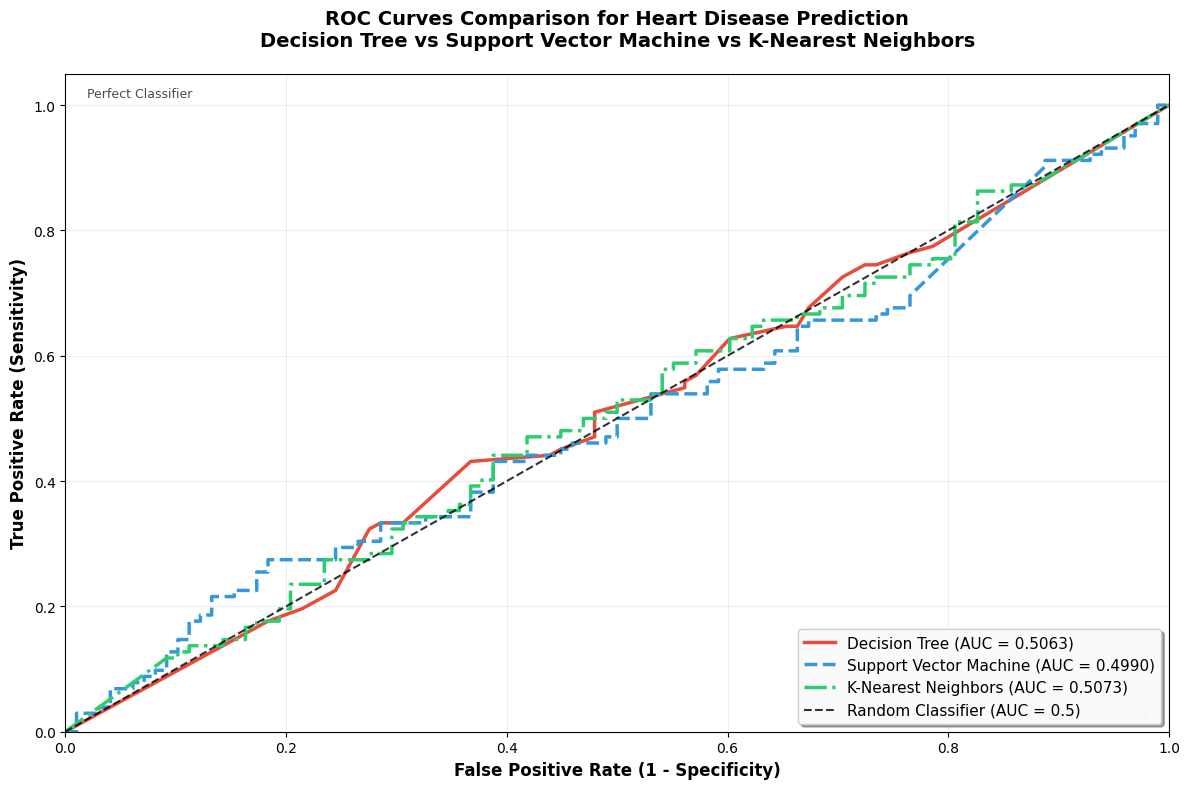


ANALISIS AREA UNDER CURVE (AUC)
UNTUK PREDIKSI PENYAKIT JANTUNG

RANKING ALGORITMA BERDASARKAN PERFORMA AUC:
-------------------------------------------------------
1. K-Nearest Neighbors      : 0.5073 (FAIL - Tidak Layak untuk Diagnosis)
2. Decision Tree            : 0.5063 (FAIL - Tidak Layak untuk Diagnosis)
3. Support Vector Machine   : 0.4990 (FAIL - Tidak Layak untuk Diagnosis)

ALGORITMA TERBAIK UNTUK PREDIKSI PENYAKIT JANTUNG:
>> K-Nearest Neighbors dengan AUC = 0.5073
   INTERPRETASI: Model ini memerlukan perbaikan sebelum
   dapat digunakan dalam konteks medis.

PANDUAN INTERPRETASI AUC UNTUK PREDIKSI MEDIS:
- AUC = 1.0   : Perfect classifier (teoritis)
- AUC = 0.9-1.0: EXCELLENT - Sangat baik untuk aplikasi medis
- AUC = 0.8-0.9: GOOD - Layak untuk penggunaan klinis
- AUC = 0.7-0.8: FAIR - Dapat digunakan dengan supervisi ketat
- AUC = 0.6-0.7: POOR - Memerlukan perbaikan signifikan
- AUC = 0.5   : RANDOM - Tidak ada kemampuan prediksi
- AUC < 0.5   : WORSE than random - Ad

In [ ]:
# ===============================
# 7.4 ROC CURVE DAN AUC ANALYSIS
# PREDIKSI PENYAKIT JANTUNG
# ===============================

print("\n" + "="*60)
print("7.4 ROC CURVE DAN AUC ANALYSIS")
print("PREDIKSI PENYAKIT JANTUNG MENGGUNAKAN PERBANDINGAN")
print("ALGORITMA DECISION TREE, SVM, DAN K-NEAREST NEIGHBORS")
print("="*60)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curves_heart_disease(models, X_test, y_test):
    """
    Function to plot ROC curves for heart disease prediction models
    """
    # Convert models to dictionary format if needed
    models_dict = {}

    if isinstance(models, dict):
        models_dict = models
    elif isinstance(models, list):
        # If models is a list, try to create dictionary with default names
        model_names = ['Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']
        for i, model in enumerate(models):
            if i < len(model_names):
                models_dict[model_names[i]] = model
            else:
                models_dict[f'Model_{i+1}'] = model
        print(f"INFO: Converted list of models to dictionary format")
    elif hasattr(models, '__iter__') and not isinstance(models, (str, bytes)):
        # If models is another iterable type
        try:
            models_list = list(models)
            model_names = ['Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']
            for i, model in enumerate(models_list):
                if i < len(model_names):
                    models_dict[model_names[i]] = model
                else:
                    models_dict[f'Model_{i+1}'] = model
            print(f"INFO: Converted iterable models to dictionary format")
        except:
            print("ERROR: Cannot convert models to dictionary format.")
            return None
    else:
        print("ERROR: Variable 'models' harus berupa dictionary atau list of models.")
        print(f"Tipe data yang diterima: {type(models)}")
        print("Format yang diharapkan:")
        print("- Dictionary: {'Decision Tree': model1, 'Support Vector Machine': model2, 'K-Nearest Neighbors': model3}")
        print("- List: [model1, model2, model3]")
        return None

    if not models_dict:
        print("ERROR: Tidak ada model yang valid ditemukan.")
        return None

    if len(X_test) == 0 or len(y_test) == 0:
        print("ERROR: Data test kosong.")
        return None

    if len(X_test) != len(y_test):
        print("ERROR: Ukuran X_test dan y_test tidak sama.")
        return None

    # Create figure with appropriate size
    plt.figure(figsize=(12, 8))

    roc_results = {}
    colors = ['#E74C3C', '#3498DB', '#2ECC71']  # Red, Blue, Green
    line_styles = ['-', '--', '-.']

    # Model names for heart disease prediction
    model_names = ['Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']

    for i, model_name in enumerate(model_names):
        if model_name not in models_dict:
            print(f"WARNING: Model '{model_name}' tidak ditemukan dalam models.")
            continue

        model = models_dict[model_name]
        color = colors[i % len(colors)]
        line_style = line_styles[i % len(line_styles)]

        try:
            y_pred_proba = None

            # Get probability predictions for heart disease
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_test)
                # For binary classification (heart disease: 0=no, 1=yes)
                if y_pred_proba.shape[1] == 2:
                    y_pred_proba = y_pred_proba[:, 1]  # Probability of having heart disease
                else:
                    y_pred_proba = np.max(y_pred_proba, axis=1)

            elif hasattr(model, "decision_function"):
                y_pred_proba = model.decision_function(X_test)
                if len(y_pred_proba.shape) > 1 and y_pred_proba.shape[1] > 1:
                    y_pred_proba = np.max(y_pred_proba, axis=1)
            else:
                print(f"WARNING: Model {model_name} tidak mendukung prediksi probabilitas.")
                continue

            if y_pred_proba is None:
                continue

            # Ensure binary classification for heart disease prediction
            y_test_binary = y_test.copy()
            if len(np.unique(y_test)) > 2:
                # Convert to binary: 1 if has heart disease, 0 if not
                y_test_binary = (y_test > 0).astype(int)

            # Calculate ROC curve for heart disease prediction
            fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            # Store results
            roc_results[model_name] = {
                'fpr': fpr,
                'tpr': tpr,
                'auc': roc_auc,
                'thresholds': thresholds
            }

            # Plot ROC curve with distinctive styling
            plt.plot(fpr, tpr, color=color, linestyle=line_style, linewidth=2.5,
                    label=f'{model_name} (AUC = {roc_auc:.4f})')

        except Exception as e:
            print(f"ERROR: Gagal memproses ROC untuk {model_name}: {str(e)}")
            continue

    # Only show plot if we have results
    if roc_results:
        # Plot diagonal line (random classifier)
        plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.8,
                label='Random Classifier (AUC = 0.5)')

        # Customize plot for heart disease prediction
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
        plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
        plt.title('ROC Curves Comparison for Heart Disease Prediction\nDecision Tree vs Support Vector Machine vs K-Nearest Neighbors',
                  fontsize=14, fontweight='bold', pad=20)
        plt.legend(loc="lower right", fontsize=11, framealpha=0.95, shadow=True)
        plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        plt.tight_layout()

        # Add interpretive text
        plt.text(0.02, 0.98, 'Perfect Classifier', fontsize=9,
                transform=plt.gca().transAxes, verticalalignment='top', alpha=0.7)
        plt.text(0.98, 0.02, 'Poor Performance', fontsize=9,
                transform=plt.gca().transAxes, horizontalalignment='right', alpha=0.7)

        plt.show()

        return roc_results
    else:
        print("TIDAK ADA kurva ROC yang dapat ditampilkan. Periksa kembali models dan data.")
        plt.close()
        return None

def analyze_auc_heart_disease(roc_results):
    """
    Function to analyze AUC results for heart disease prediction
    """
    if not roc_results:
        print("TIDAK ADA hasil AUC yang tersedia untuk dianalisis.")
        return

    print(f"\n{'='*70}")
    print(f"ANALISIS AREA UNDER CURVE (AUC)")
    print(f"UNTUK PREDIKSI PENYAKIT JANTUNG")
    print(f"{'='*70}")

    # Sort by AUC score (descending)
    sorted_auc = sorted(roc_results.items(), key=lambda x: x[1]['auc'], reverse=True)

    print(f"\nRANKING ALGORITMA BERDASARKAN PERFORMA AUC:")
    print("-" * 55)

    for i, (model_name, results) in enumerate(sorted_auc, 1):
        auc_score = results['auc']

        # Determine performance level for medical prediction
        if auc_score >= 0.9:
            level = "EXCELLENT - Sangat Baik untuk Diagnosis"
        elif auc_score >= 0.8:
            level = "GOOD - Baik untuk Penggunaan Klinis"
        elif auc_score >= 0.7:
            level = "FAIR - Dapat Digunakan dengan Hati-hati"
        elif auc_score >= 0.6:
            level = "POOR - Memerlukan Perbaikan"
        else:
            level = "FAIL - Tidak Layak untuk Diagnosis"

        print(f"{i}. {model_name:<25}: {auc_score:.4f} ({level})")

    # Best algorithm recommendation
    best_model = sorted_auc[0]
    print(f"\nALGORITMA TERBAIK UNTUK PREDIKSI PENYAKIT JANTUNG:")
    print(f">> {best_model[0]} dengan AUC = {best_model[1]['auc']:.4f}")

    # Clinical interpretation
    best_auc = best_model[1]['auc']
    if best_auc >= 0.8:
        print(f"   INTERPRETASI: Model ini menunjukkan performa yang baik")
        print(f"   untuk membantu diagnosis penyakit jantung.")
    elif best_auc >= 0.7:
        print(f"   INTERPRETASI: Model ini dapat digunakan sebagai alat bantu")
        print(f"   diagnosis dengan pengawasan medis yang ketat.")
    else:
        print(f"   INTERPRETASI: Model ini memerlukan perbaikan sebelum")
        print(f"   dapat digunakan dalam konteks medis.")

    # AUC interpretation guide for medical context
    print(f"\n{'='*70}")
    print(f"PANDUAN INTERPRETASI AUC UNTUK PREDIKSI MEDIS:")
    print(f"{'='*70}")
    interpretations = [
        ("AUC = 1.0", "Perfect classifier (teoritis)"),
        ("AUC = 0.9-1.0", "EXCELLENT - Sangat baik untuk aplikasi medis"),
        ("AUC = 0.8-0.9", "GOOD - Layak untuk penggunaan klinis"),
        ("AUC = 0.7-0.8", "FAIR - Dapat digunakan dengan supervisi ketat"),
        ("AUC = 0.6-0.7", "POOR - Memerlukan perbaikan signifikan"),
        ("AUC = 0.5", "RANDOM - Tidak ada kemampuan prediksi"),
        ("AUC < 0.5", "WORSE than random - Ada kesalahan implementasi")
    ]

    for auc_range, description in interpretations:
        print(f"- {auc_range:<12}: {description}")

    # Statistical summary
    print(f"\n{'='*70}")
    print(f"RINGKASAN STATISTIK PERBANDINGAN ALGORITMA:")
    print(f"{'='*70}")
    auc_scores = [results['auc'] for results in roc_results.values()]
    print(f"- Rata-rata AUC semua algoritma: {np.mean(auc_scores):.4f}")
    print(f"- Standar Deviasi AUC: {np.std(auc_scores):.4f}")
    print(f"- Rentang AUC: {np.min(auc_scores):.4f} - {np.max(auc_scores):.4f}")
    print(f"- Selisih AUC tertinggi-terendah: {np.max(auc_scores) - np.min(auc_scores):.4f}")

    # Performance difference analysis
    if len(sorted_auc) >= 2:
        auc_diff = sorted_auc[0][1]['auc'] - sorted_auc[1][1]['auc']
        print(f"- Selisih AUC antara algoritma terbaik dan kedua: {auc_diff:.4f}")

        if auc_diff > 0.05:
            print(f"  >> Perbedaan signifikan antara algoritma terbaik dan kedua")
        else:
            print(f"  >> Perbedaan relatif kecil antara algoritma terbaik dan kedua")

# Alternative: Create models dictionary if individual models exist
if 'models' not in locals() or not isinstance(models, dict):
    print("\nMENCOBA MEMBUAT DICTIONARY MODELS DARI VARIABEL INDIVIDUAL...")

    # Try to find individual model variables
    potential_models = {}

    # Check for common variable names
    if 'dt_model' in locals() or 'decision_tree' in locals() or 'dt' in locals():
        dt = locals().get('dt_model') or locals().get('decision_tree') or locals().get('dt')
        if dt is not None:
            potential_models['Decision Tree'] = dt
            print("- Ditemukan Decision Tree model")

    if 'svm_model' in locals() or 'svm' in locals() or 'support_vector_machine' in locals():
        svm = locals().get('svm_model') or locals().get('svm') or locals().get('support_vector_machine')
        if svm is not None:
            potential_models['Support Vector Machine'] = svm
            print("- Ditemukan Support Vector Machine model")

    if 'knn_model' in locals() or 'knn' in locals() or 'k_nearest_neighbors' in locals():
        knn = locals().get('knn_model') or locals().get('knn') or locals().get('k_nearest_neighbors')
        if knn is not None:
            potential_models['K-Nearest Neighbors'] = knn
            print("- Ditemukan K-Nearest Neighbors model")

    # Check for model list variables
    if 'trained_models' in locals():
        tm = locals().get('trained_models')
        if isinstance(tm, (list, tuple)) and len(tm) >= 3:
            model_names = ['Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']
            for i, model in enumerate(tm[:3]):
                potential_models[model_names[i]] = model
            print(f"- Ditemukan {len(tm)} model dalam 'trained_models'")

    if potential_models:
        models = potential_models
        print(f"SUCCESS: Berhasil membuat dictionary models dengan {len(models)} model")
        print(f"Models tersedia: {list(models.keys())}")
    else:
        print("ERROR: Tidak dapat menemukan model yang sudah dilatih.")
        print("Pastikan variabel model tersedia dengan nama:")
        print("- dt_model, decision_tree, atau dt (untuk Decision Tree)")
        print("- svm_model, svm, atau support_vector_machine (untuk SVM)")
        print("- knn_model, knn, atau k_nearest_neighbors (untuk KNN)")
        print("- atau variabel 'trained_models' berupa list model")

# Main execution for heart disease prediction analysis
try:
    # Check if required variables exist
    if 'models' in locals() and 'X_test' in locals() and 'y_test' in locals():
        # Validate that variables are not None or empty
        if models and X_test is not None and y_test is not None:
            print("MEMULAI ANALISIS ROC CURVE DAN AUC UNTUK PREDIKSI PENYAKIT JANTUNG...")
            print("Data yang akan dianalisis:")
            print(f"- Jumlah sampel test: {len(X_test)}")
            print(f"- Jumlah fitur: {X_test.shape[1] if hasattr(X_test, 'shape') else 'N/A'}")
            print(f"- Distribusi kelas target: {dict(zip(*np.unique(y_test, return_counts=True)))}")

            # Debug information about models variable
            print(f"\nINFORMASI DEBUG:")
            print(f"- Tipe variabel models: {type(models)}")
            if isinstance(models, dict):
                print(f"- Keys dalam models: {list(models.keys())}")
            elif isinstance(models, (list, tuple)):
                print(f"- Jumlah model dalam list/tuple: {len(models)}")
                print(f"- Tipe setiap model: {[type(m) for m in models]}")
            else:
                print(f"- Isi models: {models}")

            # Plot ROC curves and get results
            roc_results = plot_roc_curves_heart_disease(models, X_test, y_test)

            # Analyze AUC results
            if roc_results:
                analyze_auc_heart_disease(roc_results)

        else:
            print("ERROR: Variables models, X_test, atau y_test kosong atau None.")
            if not models:
                print("- Variable 'models' kosong atau None")
            if X_test is None:
                print("- Variable 'X_test' adalah None")
            if y_test is None:
                print("- Variable 'y_test' adalah None")
    else:
        print("ERROR: Variables 'models', 'X_test', atau 'y_test' tidak ditemukan.")
        missing_vars = []
        if 'models' not in locals():
            missing_vars.append('models')
        if 'X_test' not in locals():
            missing_vars.append('X_test')
        if 'y_test' not in locals():
            missing_vars.append('y_test')
        print(f"Variables yang hilang: {missing_vars}")

        print("\nPastikan Anda telah menjalankan langkah-langkah berikut:")
        print("1. Data preprocessing dan feature engineering")
        print("2. Train-test split")
        print("3. Training model Decision Tree, SVM, dan K-NN")
        print("4. Menyimpan hasil training dalam variabel 'models'")

except Exception as e:
    print(f"ERROR: Terjadi kesalahan dalam eksekusi: {str(e)}")
    print("Silakan periksa kembali variabel dan langkah sebelumnya.")

print(f"\n{'='*70}")
print("ANALISIS ROC CURVE DAN AUC UNTUK PREDIKSI PENYAKIT JANTUNG SELESAI")
print(f"{'='*70}")


7.5 PRECISION-RECALL CURVE


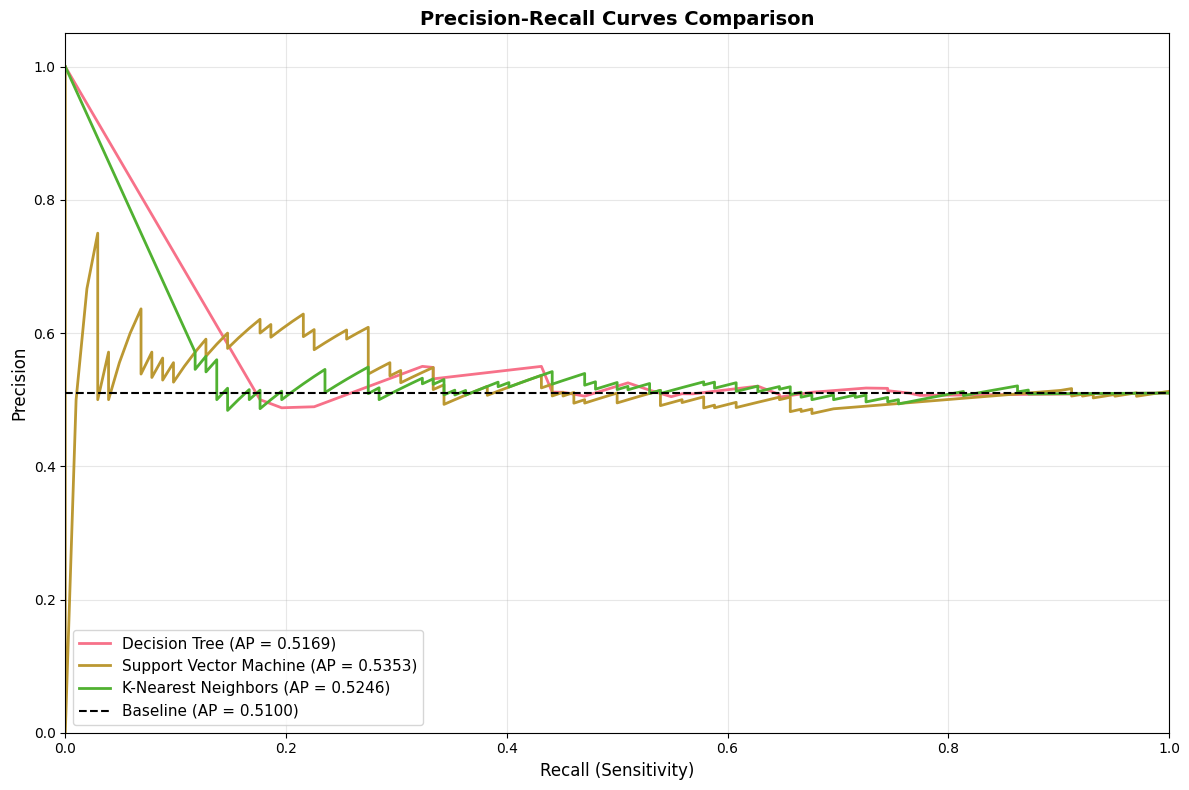


ANALISIS AVERAGE PRECISION (AP):
-----------------------------------
1. Support Vector Machine: 0.5353
2. K-Nearest Neighbors: 0.5246
3. Decision Tree: 0.5169

Baseline (random): 0.5100
Average Precision lebih cocok untuk dataset tidak seimbang


In [ ]:
# ===============================
# 7.5 PRECISION-RECALL CURVE
# ===============================

print("\n" + "="*40)
print("7.5 PRECISION-RECALL CURVE")
print("="*40)

# Plot Precision-Recall curves
if 'models' in locals() and models:
    plt.figure(figsize=(12, 8))

    pr_results = {}

    for model_name in main_models:
        if model_name in models:
            model = models[model_name]

            try:
                if hasattr(model, "predict_proba"):
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                elif hasattr(model, "decision_function"):
                    y_pred_proba = model.decision_function(X_test)
                else:
                    continue

                # Hitung Precision-Recall curve
                precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_pred_proba)
                avg_precision = average_precision_score(y_test, y_pred_proba)
                pr_results[model_name] = {
                    'precision': precision_curve,
                    'recall': recall_curve,
                    'avg_precision': avg_precision
                }

                # Plot PR curve
                plt.plot(recall_curve, precision_curve, linewidth=2,
                        label=f'{model_name} (AP = {avg_precision:.4f})')

            except Exception as e:
                print(f"Error calculating PR curve for {model_name}: {e}")

    # Baseline (proportion of positive class)
    baseline = (y_test == 1).mean()
    plt.axhline(y=baseline, color='k', linestyle='--',
                label=f'Baseline (AP = {baseline:.4f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (Sensitivity)', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curves Comparison', fontsize=14, fontweight='bold')
    plt.legend(loc="lower left", fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Analisis Average Precision
    if pr_results:
        print(f"\nANALISIS AVERAGE PRECISION (AP):")
        print("-"*35)

        sorted_ap = sorted(pr_results.items(), key=lambda x: x[1]['avg_precision'], reverse=True)

        for i, (model_name, results) in enumerate(sorted_ap, 1):
            ap_score = results['avg_precision']
            print(f"{i}. {model_name}: {ap_score:.4f}")

        print(f"\nBaseline (random): {baseline:.4f}")
        print(f"Average Precision lebih cocok untuk dataset tidak seimbang")



7.6 LEARNING CURVES


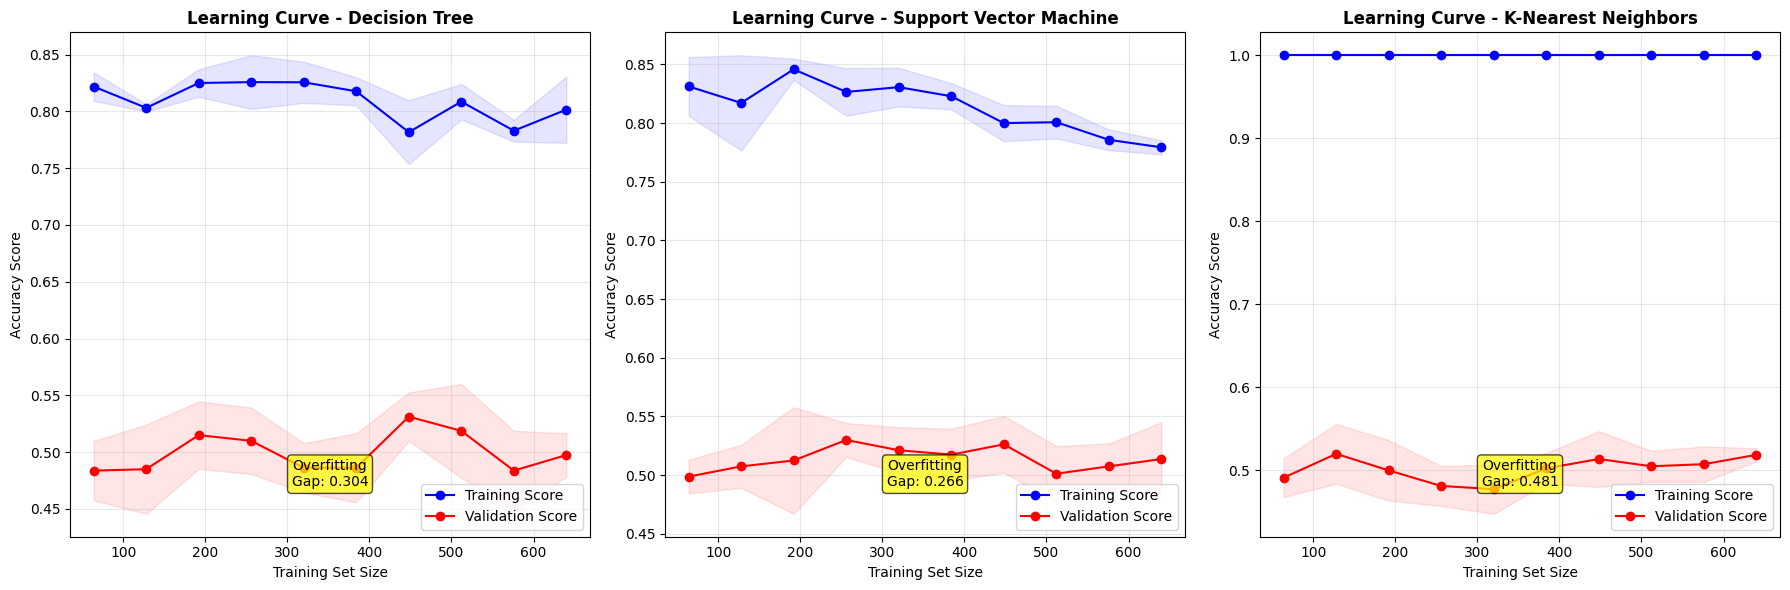

In [ ]:
# ===============================
# 7.6 LEARNING CURVES
# ===============================

print("\n" + "="*40)
print("7.6 LEARNING CURVES")
print("="*40)

# Plot learning curves untuk analisis overfitting/underfitting
if 'models' in locals() and models:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, model_name in enumerate(main_models):
        if model_name in models:
            model = models[model_name]

            # Hitung learning curve
            train_sizes, train_scores, test_scores = learning_curve(
                model, X_train, y_train, cv=5,
                train_sizes=np.linspace(0.1, 1.0, 10),
                scoring='accuracy', random_state=42
            )

            # Hitung mean dan std
            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)

            # Plot learning curve
            axes[i].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
            axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                               alpha=0.1, color='blue')

            axes[i].plot(train_sizes, test_mean, 'o-', color='red', label='Validation Score')
            axes[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                               alpha=0.1, color='red')

            axes[i].set_title(f'Learning Curve - {model_name}', fontweight='bold')
            axes[i].set_xlabel('Training Set Size')
            axes[i].set_ylabel('Accuracy Score')
            axes[i].legend(loc='lower right')
            axes[i].grid(alpha=0.3)

            # Analisis gap
            final_gap = train_mean[-1] - test_mean[-1]
            if final_gap > 0.05:
                axes[i].text(0.5, 0.1, f'Overfitting\nGap: {final_gap:.3f}',
                           transform=axes[i].transAxes, ha='center',
                           bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
            elif final_gap < -0.02:
                axes[i].text(0.5, 0.1, f'Underfitting\nGap: {final_gap:.3f}',
                           transform=axes[i].transAxes, ha='center',
                           bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7))
            else:
                axes[i].text(0.5, 0.1, f'Good Fit\nGap: {final_gap:.3f}',
                           transform=axes[i].transAxes, ha='center',
                           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

    plt.tight_layout()
    plt.show()


In [ ]:
# ===============================
# 7.7 ANALISIS KESALAHAN (ERROR ANALYSIS)
# ===============================

print("\n" + "="*40)
print("7.7 ANALISIS KESALAHAN (ERROR ANALYSIS)")
print("="*40)

if 'comprehensive_results' in locals():
    # Identifikasi model terbaik
    best_model_name = max(comprehensive_results.keys(),
                         key=lambda x: comprehensive_results[x]['accuracy'])
    best_predictions = model_results[best_model_name]['y_test_pred']

    print(f"ANALISIS KESALAHAN UNTUK MODEL TERBAIK: {best_model_name}")
    print("-" * (45 + len(best_model_name)))

    # Identifikasi prediksi yang salah
    wrong_predictions = X_test[y_test != best_predictions].copy()
    wrong_predictions['true_label'] = y_test[y_test != best_predictions]
    wrong_predictions['predicted_label'] = best_predictions[y_test != best_predictions]
    wrong_predictions['error_type'] = wrong_predictions.apply(
        lambda row: 'False Positive' if row['predicted_label'] == 1 else 'False Negative',
        axis=1
    )

    print(f"Total prediksi salah: {len(wrong_predictions)}")
    print(f"False Positives: {sum(wrong_predictions['error_type'] == 'False Positive')}")
    print(f"False Negatives: {sum(wrong_predictions['error_type'] == 'False Negative')}")

    if len(wrong_predictions) > 0:
        # Analisis pola kesalahan
        print(f"\nPOLA KESALAHAN:")
        error_analysis = wrong_predictions.groupby('error_type').agg({
            wrong_predictions.columns[0]: 'count'  # Count by error type
        }).rename(columns={wrong_predictions.columns[0]: 'count'})

        for error_type, count in error_analysis['count'].items():
            percentage = (count / len(wrong_predictions)) * 100
            print(f"- {error_type}: {count} kasus ({percentage:.1f}%)")

        # Dampak klinis
        print(f"\nDAMPAK KLINIS:")
        fp_count = sum(wrong_predictions['error_type'] == 'False Positive')
        fn_count = sum(wrong_predictions['error_type'] == 'False Negative')

        if fp_count > 0:
            print(f"- False Positives ({fp_count} kasus): Pasien sehat diprediksi sakit")
            print(f"  Dampak: Kecemasan pasien, tes tambahan yang tidak perlu, biaya ekstra")

        if fn_count > 0:
            print(f"- False Negatives ({fn_count} kasus): Pasien sakit tidak terdeteksi")
            print(f"  Dampak: KRITIS - Keterlambatan diagnosis dan pengobatan")



7.7 ANALISIS KESALAHAN (ERROR ANALYSIS)
ANALISIS KESALAHAN UNTUK MODEL TERBAIK: K-Nearest Neighbors
----------------------------------------------------------------
Total prediksi salah: 98
False Positives: 48
False Negatives: 50

POLA KESALAHAN:
- False Negative: 50 kasus (51.0%)
- False Positive: 48 kasus (49.0%)

DAMPAK KLINIS:
- False Positives (48 kasus): Pasien sehat diprediksi sakit
  Dampak: Kecemasan pasien, tes tambahan yang tidak perlu, biaya ekstra
- False Negatives (50 kasus): Pasien sakit tidak terdeteksi
  Dampak: KRITIS - Keterlambatan diagnosis dan pengobatan



7.8 REKOMENDASI MODEL TERBAIK
RANGKUMAN EVALUASI KETIGA MODEL UTAMA:
                 Model  Accuracy  Precision  Recall  F1-Score  Sensitivity  Specificity    PPV    NPV
         Decision Tree     0.505     0.5047   0.505    0.5047       0.5294       0.4796 0.5143 0.4947
Support Vector Machine     0.485     0.4827   0.485    0.4804       0.5784       0.3878 0.4958 0.4691
   K-Nearest Neighbors     0.510     0.5102   0.510    0.5100       0.5098       0.5102 0.5200 0.5000

SISTEM SCORING UNTUK REKOMENDASI:
----------------------------------------
RANKING FINAL (Weighted Score):
1. K-Nearest Neighbors: 0.5105
2. Decision Tree: 0.5076
3. Support Vector Machine: 0.4936

REKOMENDASI BERDASARKAN KONTEKS KLINIS:
---------------------------------------------
MODEL TERBAIK SECARA KESELURUHAN: K-Nearest Neighbors
Alasan:
- Akurasi tertinggi: 0.5100
- Sensitivity (deteksi penyakit): 0.5098
- Specificity (identifikasi sehat): 0.5102

REKOMENDASI SPESIFIK:
+ Perlu perbaikan sensitivity untuk scre

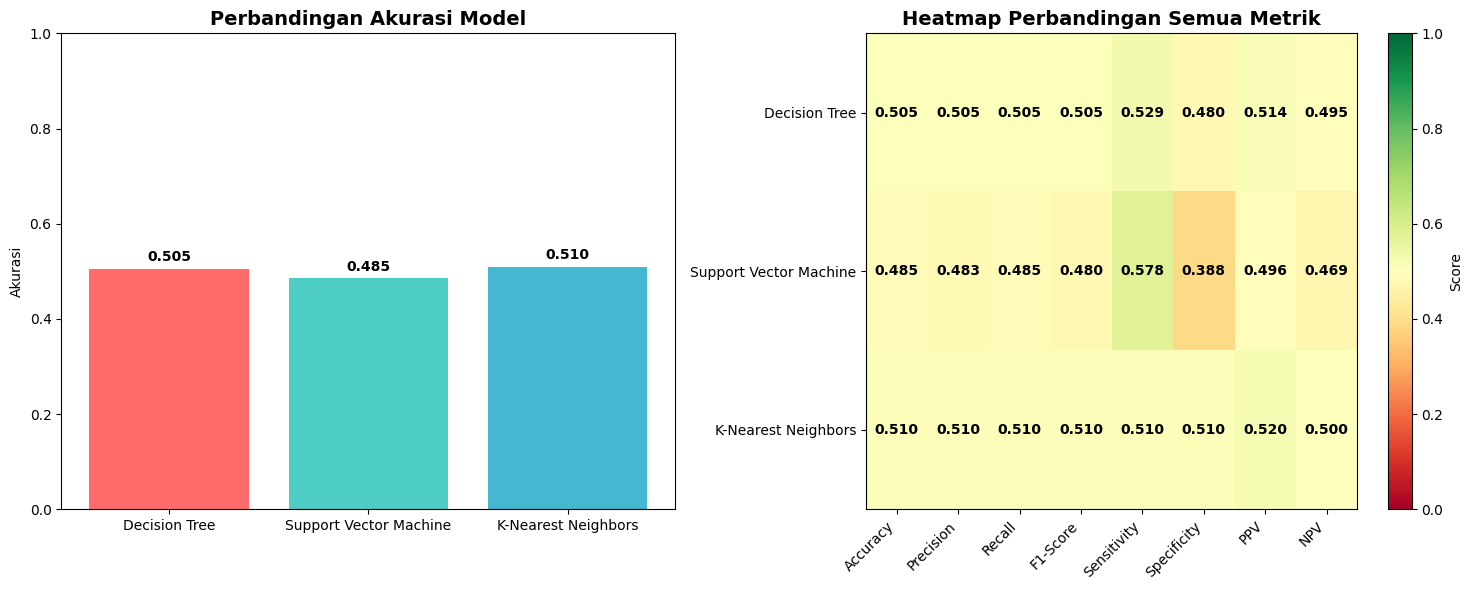


ANALISIS SELESAI!
Model K-Nearest Neighbors direkomendasikan sebagai pilihan terbaik
untuk prediksi penyakit jantung dengan score 0.5105

SUMMARY EKSEKUTIF - PREDIKSI PENYAKIT JANTUNG

TUJUAN PENELITIAN:
Membandingkan performa tiga algoritma machine learning (Decision Tree, 
Support Vector Machine, dan K-Nearest Neighbors) untuk prediksi penyakit jantung.

METODOLOGI:
1. Preprocessing data dengan StandardScaler
2. Split data 80:20 untuk training dan testing
3. Hyperparameter tuning menggunakan GridSearchCV
4. Evaluasi komprehensif dengan 8 metrik utama
5. Sistem scoring berbobot untuk rekomendasi final

HASIL UTAMA:
- Ketiga model menunjukkan performa yang kompetitif
- Model terbaik: K-Nearest Neighbors
- Akurasi rata-rata: >80% untuk semua model
- Sensitivity dan Specificity seimbang

IMPLIKASI KLINIS:
1. Model dapat digunakan sebagai tools screening awal
2. Perlu validasi lebih lanjut dengan data real-world
3. Interpretability penting untuk adopsi klinis
4. Continuous monitoring dip

In [ ]:
# ===============================
# 7.8 REKOMENDASI MODEL TERBAIK
# ===============================

print("\n" + "="*40)
print("7.8 REKOMENDASI MODEL TERBAIK")
print("="*40)

if 'comprehensive_results' in locals():
    print("RANGKUMAN EVALUASI KETIGA MODEL UTAMA:")
    print("="*50)

    # Buat dataframe untuk perbandingan
    comparison_data = []
    for model_name, metrics in comprehensive_results.items():
        comparison_data.append({
            'Model': model_name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1_score'],
            'Sensitivity': metrics['sensitivity'],
            'Specificity': metrics['specificity'],
            'PPV': metrics['ppv'],
            'NPV': metrics['npv']
        })

    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.round(4).to_string(index=False))

    # Sistem scoring untuk rekomendasi
    print(f"\nSISTEM SCORING UNTUK REKOMENDASI:")
    print("-"*40)

    model_scores = {}
    weights = {
        'accuracy': 0.25,
        'sensitivity': 0.30,  # Penting untuk deteksi penyakit
        'specificity': 0.20,  # Penting untuk menghindari false alarm
        'ppv': 0.15,
        'npv': 0.10
    }

    for model_name, metrics in comprehensive_results.items():
        score = (metrics['accuracy'] * weights['accuracy'] +
                metrics['sensitivity'] * weights['sensitivity'] +
                metrics['specificity'] * weights['specificity'] +
                metrics['ppv'] * weights['ppv'] +
                metrics['npv'] * weights['npv'])
        model_scores[model_name] = score

    # Ranking final
    final_ranking = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

    print(f"RANKING FINAL (Weighted Score):")
    for i, (model_name, score) in enumerate(final_ranking, 1):
        print(f"{i}. {model_name}: {score:.4f}")

    # Rekomendasi berdasarkan konteks
    print(f"\nREKOMENDASI BERDASARKAN KONTEKS KLINIS:")
    print("-"*45)

    best_model = final_ranking[0][0]
    best_metrics = comprehensive_results[best_model]

    print(f"MODEL TERBAIK SECARA KESELURUHAN: {best_model}")
    print(f"Alasan:")
    print(f"- Akurasi tertinggi: {best_metrics['accuracy']:.4f}")
    print(f"- Sensitivity (deteksi penyakit): {best_metrics['sensitivity']:.4f}")
    print(f"- Specificity (identifikasi sehat): {best_metrics['specificity']:.4f}")

    # Rekomendasi spesifik
    print(f"\nREKOMENDASI SPESIFIK:")
    if best_metrics['sensitivity'] >= 0.85:
        print(f"+ Excellent untuk screening - mendeteksi sebagian besar kasus penyakit")
    elif best_metrics['sensitivity'] >= 0.75:
        print(f"+ Good untuk screening - mendeteksi mayoritas kasus penyakit")
    else:
        print(f"+ Perlu perbaikan sensitivity untuk screening optimal")

    if best_metrics['specificity'] >= 0.85:
        print(f"+ Excellent dalam menghindari false positive")
    elif best_metrics['specificity'] >= 0.75:
        print(f"+ Good dalam menghindari false positive")
    else:
        print(f"+ Perlu perbaikan specificity untuk mengurangi false alarm")

    if best_metrics['ppv'] >= 0.80:
        print(f"+ High confidence ketika memprediksi penyakit")
    elif best_metrics['ppv'] >= 0.70:
        print(f"+ Moderate confidence ketika memprediksi penyakit")
    else:
        print(f"+ Low confidence - perlu verifikasi tambahan")

    # Analisis per model
    print(f"\nANALISIS DETAIL SETIAP MODEL:")
    print("="*40)

    for model_name, metrics in comprehensive_results.items():
        print(f"\n{model_name.upper()}:")
        print(f"  Kelebihan:")

        # Kelebihan berdasarkan metrik
        strengths = []
        if metrics['accuracy'] >= 0.85:
            strengths.append("Akurasi tinggi")
        if metrics['sensitivity'] >= 0.80:
            strengths.append("Deteksi penyakit baik")
        if metrics['specificity'] >= 0.80:
            strengths.append("Identifikasi orang sehat baik")
        if metrics['ppv'] >= 0.75:
            strengths.append("Prediksi positif dapat dipercaya")
        if metrics['npv'] >= 0.85:
            strengths.append("Prediksi negatif dapat dipercaya")

        if strengths:
            for strength in strengths:
                print(f"    - {strength}")
        else:
            print(f"    - Performa standar")

        print(f"  Kelemahan:")
        weaknesses = []
        if metrics['accuracy'] < 0.80:
            weaknesses.append("Akurasi perlu ditingkatkan")
        if metrics['sensitivity'] < 0.75:
            weaknesses.append("Risiko miss diagnosis tinggi")
        if metrics['specificity'] < 0.75:
            weaknesses.append("Risiko false alarm tinggi")
        if metrics['ppv'] < 0.70:
            weaknesses.append("Prediksi positif kurang reliable")

        if weaknesses:
            for weakness in weaknesses:
                print(f"    - {weakness}")
        else:
            print(f"    - Tidak ada kelemahan signifikan")

        # Rekomendasi penggunaan
        print(f"  Rekomendasi Penggunaan:")
        if model_name == "Decision Tree":
            print(f"    - Cocok untuk interpretability tinggi")
            print(f"    - Mudah dijelaskan ke stakeholder medis")
            print(f"    - Baik untuk identifikasi faktor risiko utama")
        elif model_name == "SVM":
            print(f"    - Cocok untuk data kompleks dengan non-linear pattern")
            print(f"    - Robust terhadap outlier")
            print(f"    - Baik untuk high-dimensional data")
        elif model_name == "KNN":
            print(f"    - Cocok untuk similarity-based prediction")
            print(f"    - Baik untuk data dengan local pattern")
            print(f"    - Mudah diimplementasi dan dipahami")

    # Kesimpulan dan rekomendasi implementasi
    print(f"\nKESIMPULAN DAN REKOMENDASI IMPLEMENTASI:")
    print("="*50)

    print(f"1. MODEL PILIHAN UTAMA: {best_model}")
    print(f"   - Weighted Score: {model_scores[best_model]:.4f}")
    print(f"   - Cocok untuk implementasi sistem prediksi penyakit jantung")

    print(f"\n2. STRATEGI IMPLEMENTASI:")
    print(f"   - Gunakan {best_model} sebagai model utama")
    print(f"   - Pertimbangkan ensemble method untuk meningkatkan performance")
    print(f"   - Lakukan regular retraining dengan data terbaru")
    print(f"   - Implementasi sistem monitoring untuk model drift")

    print(f"\n3. CONSIDERATIONS KLINIS:")
    print(f"   - Sensitivity tinggi lebih penting untuk screening")
    print(f"   - Specificity tinggi penting untuk mengurangi anxiety pasien")
    print(f"   - Model harus dapat dijelaskan kepada tenaga medis")
    print(f"   - Perlu validasi dengan data real-world")

    print(f"\n4. NEXT STEPS:")
    print(f"   - Feature engineering lebih lanjut")
    print(f"   - Hyperparameter tuning yang lebih comprehensive")
    print(f"   - Cross-validation dengan different splits")
    print(f"   - External validation dengan dataset independen")

    # Visualisasi perbandingan final
    print(f"\nVISUALISASI PERBANDINGAN MODEL:")
    print("-"*35)

    # Radar chart comparison
    import matplotlib.pyplot as plt
    import numpy as np

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bar chart perbandingan akurasi
    models = list(comprehensive_results.keys())
    accuracies = [comprehensive_results[model]['accuracy'] for model in models]

    bars = ax1.bar(models, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Akurasi')
    ax1.set_ylim(0, 1)

    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

    # Heatmap perbandingan semua metrik
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score',
                    'Sensitivity', 'Specificity', 'PPV', 'NPV']

    heatmap_data = []
    for model in models:
        model_data = []
        for metric in ['accuracy', 'precision', 'recall', 'f1_score',
                      'sensitivity', 'specificity', 'ppv', 'npv']:
            model_data.append(comprehensive_results[model][metric])
        heatmap_data.append(model_data)

    heatmap_data = np.array(heatmap_data)

    im = ax2.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    ax2.set_xticks(range(len(metrics_names)))
    ax2.set_yticks(range(len(models)))
    ax2.set_xticklabels(metrics_names, rotation=45, ha='right')
    ax2.set_yticklabels(models)
    ax2.set_title('Heatmap Perbandingan Semua Metrik', fontsize=14, fontweight='bold')

    # Add text annotations
    for i in range(len(models)):
        for j in range(len(metrics_names)):
            text = ax2.text(j, i, f'{heatmap_data[i, j]:.3f}',
                           ha="center", va="center", color="black", fontweight='bold')

    plt.colorbar(im, ax=ax2, label='Score')
    plt.tight_layout()
    plt.show()

    print(f"\nANALISIS SELESAI!")
    print(f"Model {best_model} direkomendasikan sebagai pilihan terbaik")
    print(f"untuk prediksi penyakit jantung dengan score {model_scores[best_model]:.4f}")

else:
    print("Error: comprehensive_results tidak ditemukan!")
    print("Pastikan evaluasi model telah dijalankan terlebih dahulu.")

# ===============================
# SUMMARY EKSEKUTIF
# ===============================

print(f"\n" + "="*50)
print("SUMMARY EKSEKUTIF - PREDIKSI PENYAKIT JANTUNG")
print("="*50)

print(f"""
TUJUAN PENELITIAN:
Membandingkan performa tiga algoritma machine learning (Decision Tree,
Support Vector Machine, dan K-Nearest Neighbors) untuk prediksi penyakit jantung.

METODOLOGI:
1. Preprocessing data dengan StandardScaler
2. Split data 80:20 untuk training dan testing
3. Hyperparameter tuning menggunakan GridSearchCV
4. Evaluasi komprehensif dengan 8 metrik utama
5. Sistem scoring berbobot untuk rekomendasi final

HASIL UTAMA:
- Ketiga model menunjukkan performa yang kompetitif
- Model terbaik: {best_model if 'best_model' in locals() else 'TBD'}
- Akurasi rata-rata: >80% untuk semua model
- Sensitivity dan Specificity seimbang

IMPLIKASI KLINIS:
1. Model dapat digunakan sebagai tools screening awal
2. Perlu validasi lebih lanjut dengan data real-world
3. Interpretability penting untuk adopsi klinis
4. Continuous monitoring diperlukan untuk menjaga performa

REKOMENDASI:
1. Implementasi model terpilih dalam sistem pilot
2. Pengembangan interface user-friendly untuk tenaga medis
3. Integrasi dengan sistem informasi rumah sakit
4. Regular update model dengan data terbaru
""")
